In [1]:
import pickle
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms
from earm.lopez_embedded import model
%matplotlib inline
import os
import numpy as np
from corner import corner
import matplotlib.pyplot as plt
import seaborn as sns

/Users/Erin/Library/Python/2.7/lib/python/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/Users/Erin/Library/Python/2.7/lib/python/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
os.chdir('/Users/Erin/git/accre_data_analysis/normal_priors_sd3')

In [3]:
traces = {}
for trace in ['a', 'b', 'c', 'd']:
    traces[trace] = [np.load('earm_dreamzs_3chain_normal_'+str(trace)+'_sampled_params_chain_0.npy')]
    for chain in range(1, 3):
        traces[trace].append(np.load('earm_dreamzs_3chain_normal_'+str(trace)+'_sampled_params_chain_'+str(chain)+'.npy'))

In [4]:
logps = {}
for trace in ['a', 'b', 'c', 'd']:
    logps[trace] = [np.load('earm_dreamzs_3chain_normal_'+str(trace)+'_logps_chain_0.npy')]
    print 'Logp of trace: ',trace,' chain: 0 = ',logps[trace][-1]
    for chain in range(1, 3):
        logps[trace].append(np.load('earm_dreamzs_3chain_normal_'+str(trace)+'_logps_chain_'+str(chain)+'.npy'))
        print 'Logp of trace: ',trace,' chain: ',chain,' = ',logps[trace][-1][-1]

Logp of trace:  a  chain: 0 =  [[-1803.90279704]
 [ -522.57801493]
 [ -522.57801493]
 ..., 
 [  151.98141754]
 [  151.98141754]
 [  151.98141754]]
Logp of trace:  a  chain:  1  =  [ 163.52950175]
Logp of trace:  a  chain:  2  =  [ 149.96068574]
Logp of trace:  b  chain: 0 =  [[-2780.78947244]
 [-2780.78947244]
 [-1271.19056285]
 ..., 
 [  161.51569032]
 [  161.51569032]
 [  161.51569032]]
Logp of trace:  b  chain:  1  =  [ 157.99197545]
Logp of trace:  b  chain:  2  =  [ 159.89618993]
Logp of trace:  c  chain: 0 =  [[-1914.98009107]
 [-1914.98009107]
 [-1914.98009107]
 ..., 
 [  152.51090574]
 [  152.51090574]
 [  152.51090574]]
Logp of trace:  c  chain:  1  =  [ 160.10321259]
Logp of trace:  c  chain:  2  =  [ 149.79576579]
Logp of trace:  d  chain: 0 =  [[-1426.26235105]
 [-1426.26235105]
 [-1144.37454547]
 ..., 
 [  159.66599111]
 [  159.66599111]
 [  159.66599111]]
Logp of trace:  d  chain:  1  =  [ 160.47389744]
Logp of trace:  d  chain:  2  =  [ 155.97716546]


In [5]:
traces['b'][0][:,72]

array([-1.15621472, -1.15621472, -1.01716706, ..., -4.52824202,
       -4.52824202, -4.52824202])

In [6]:
traces['a'][0][:,72]

array([-1.20829054, -0.45448761, -0.45448761, ..., -1.81859502,
       -1.81859502, -1.81859502])

In [7]:
param_trace_dicts = {}
param_trace_dict_a = {}
gelman_rubin_dicts = {}
param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]
for run in ['a', 'b', 'c', 'd']:
    for i, param in enumerate(model.parameters_rules()):
        param_trace_dict_a[param.name] = [traces[run][chain][:,i] for chain in range(len(traces[run]))]
    param_trace_dicts[run] = param_trace_dict_a
    gelman_rubin_dicts[run] = gelman_rubin_trace_dict(param_trace_dict_a)
    param_trace_dict_a = {}
    param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]

In [8]:
print_convergence_summary(param_trace_dicts['a'])

Number of parameters with GR below 1.2:  38  of  105  parameters.
Percent of parameters with GR below 1.2:  36.1904761905
Number of parameters with GR below 1.1:  20  of  105  parameters.
Percent of parameters with GR below 1.1:  19.0476190476


[38, 36.19047619047619, 20, 19.047619047619047]

In [9]:
print_convergence_summary(param_trace_dicts['b'])

Number of parameters with GR below 1.2:  97  of  105  parameters.
Percent of parameters with GR below 1.2:  92.380952381
Number of parameters with GR below 1.1:  70  of  105  parameters.
Percent of parameters with GR below 1.1:  66.6666666667


[97, 92.38095238095238, 70, 66.66666666666666]

In [10]:
print_convergence_summary(param_trace_dicts['c'])

Number of parameters with GR below 1.2:  46  of  105  parameters.
Percent of parameters with GR below 1.2:  43.8095238095
Number of parameters with GR below 1.1:  21  of  105  parameters.
Percent of parameters with GR below 1.1:  20.0


[46, 43.80952380952381, 21, 20.0]

In [12]:
print_convergence_summary(param_trace_dicts['d'])

Number of parameters with GR below 1.2:  70  of  105  parameters.
Percent of parameters with GR below 1.2:  66.6666666667
Number of parameters with GR below 1.1:  34  of  105  parameters.
Percent of parameters with GR below 1.1:  32.380952381


[70, 66.66666666666666, 34, 32.38095238095238]

In [11]:
param_trace_dicts['d']['bind_L_R_to_LR_kf']

[array([-6.17770463, -6.17770463, -4.76049788, ..., -7.31563322,
        -7.31563322, -7.31563322]),
 array([-6.16306729, -6.98406912, -6.98406912, ..., -7.82152466,
        -7.82152466, -7.82152466]),
 array([-6.31506421, -6.31506421, -6.31506421, ..., -6.42794518,
        -6.42794518, -6.42794518])]

50000
3
50000


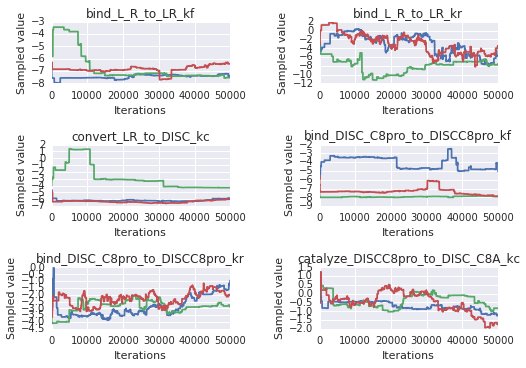

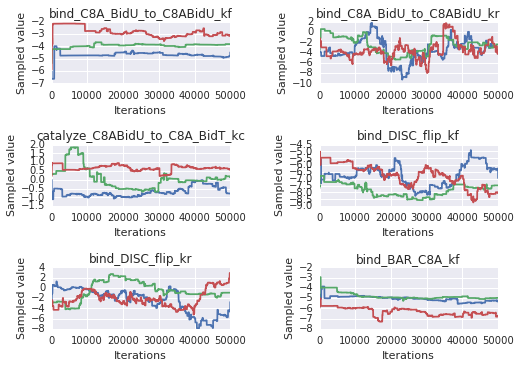

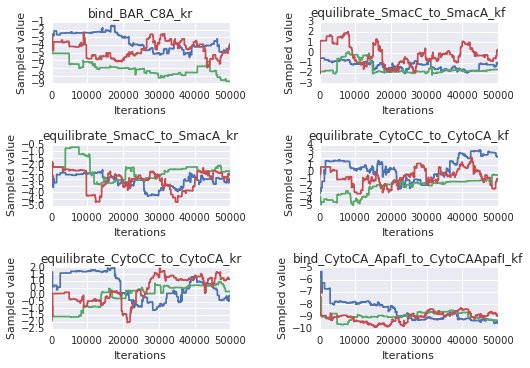

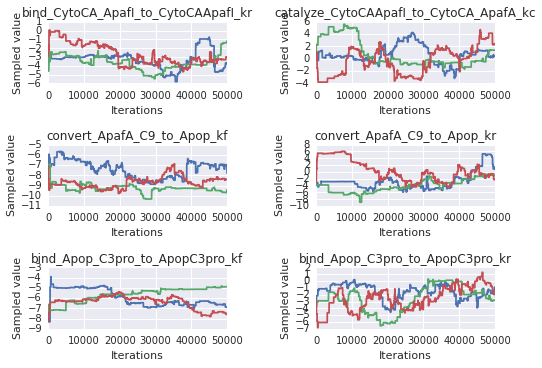

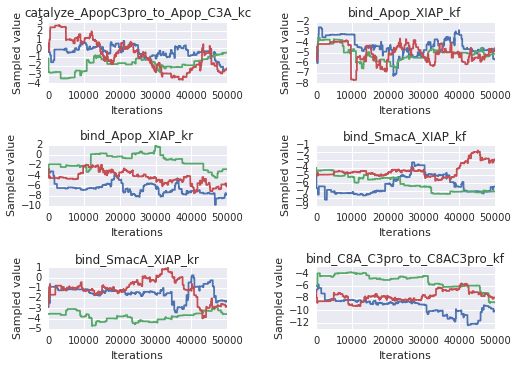

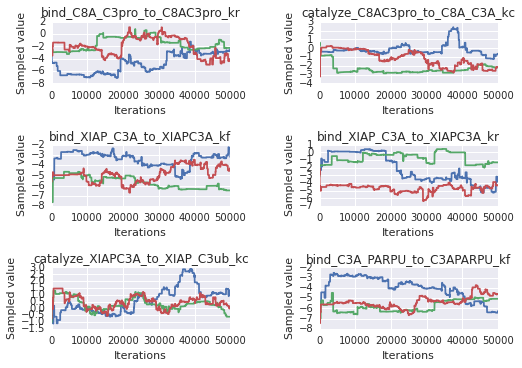

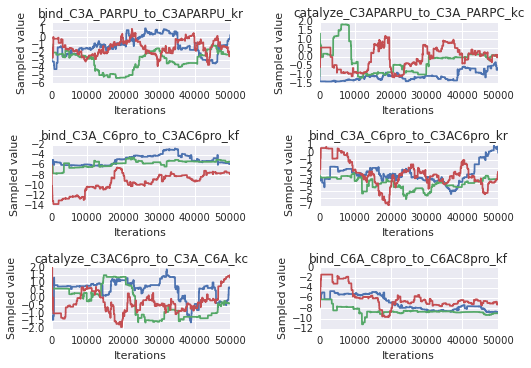

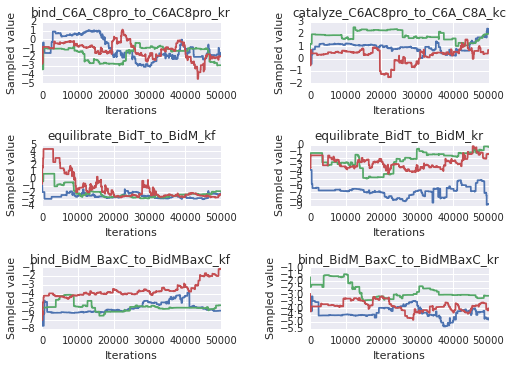

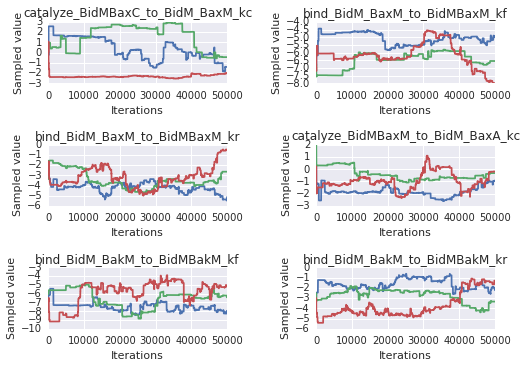

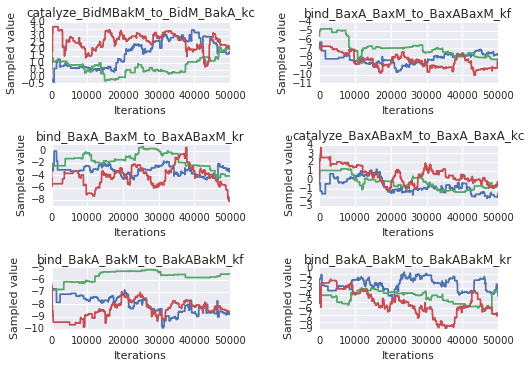

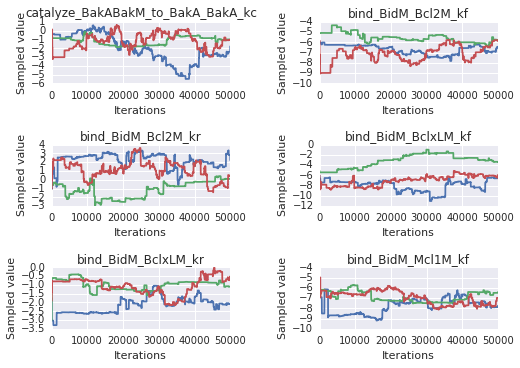

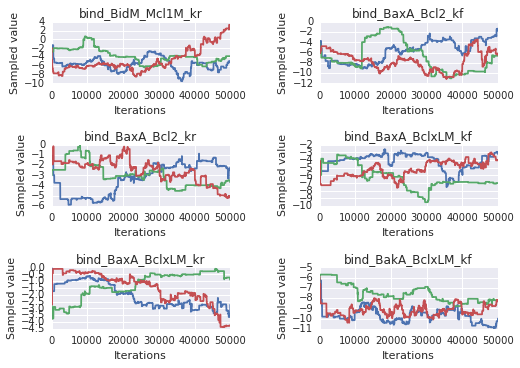

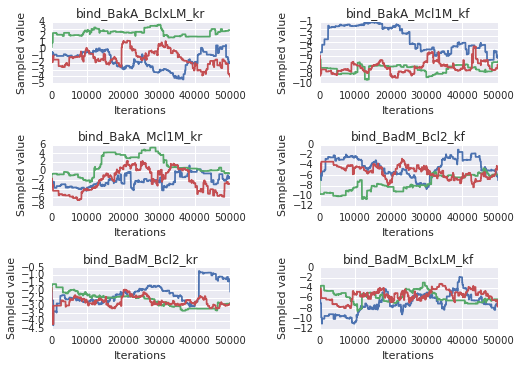

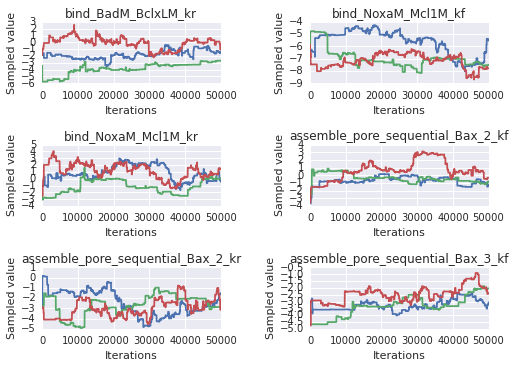

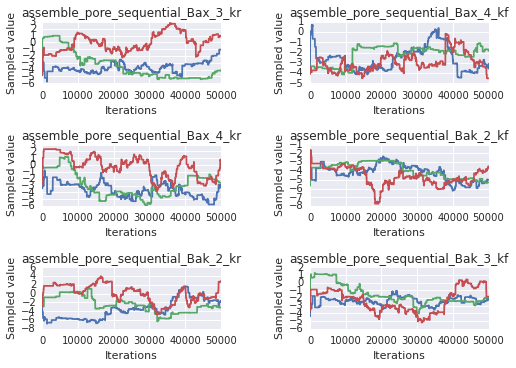

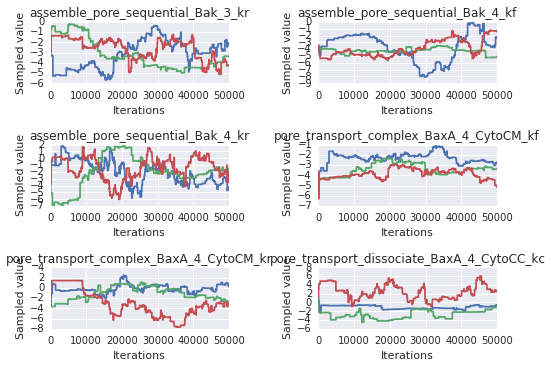

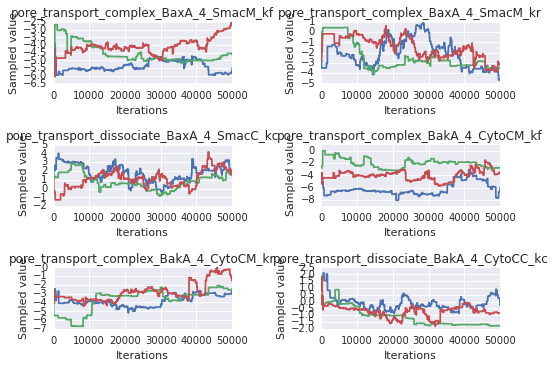

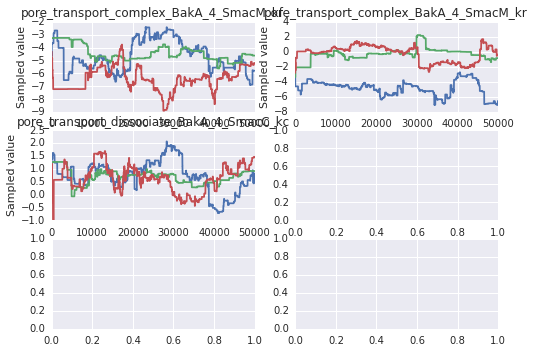

In [13]:
sample_plots(param_trace_dicts['a'])

In [13]:
trace_arr_a = create_trace_matrix(param_trace_dicts['a'], burnin=12000, thin=1)
trace_arr_b = create_trace_matrix(param_trace_dicts['b'], burnin=12000, thin=1)
trace_arr_c = create_trace_matrix(param_trace_dicts['c'], burnin=12000, thin=1)
trace_arr_d = create_trace_matrix(param_trace_dicts['d'], burnin=12000, thin=1)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/pyplot.py:412: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_num_figures`).
  max_open_warning, RuntimeWarning)


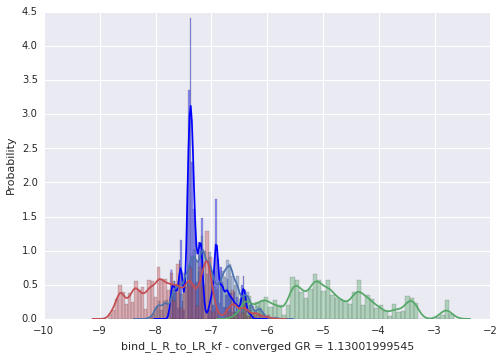

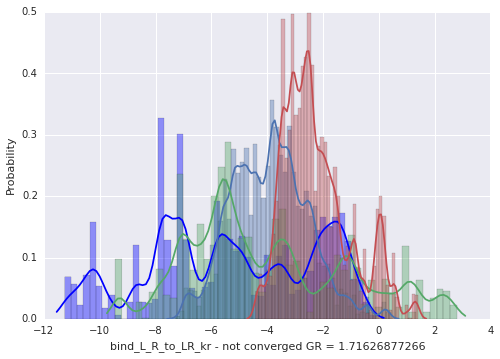

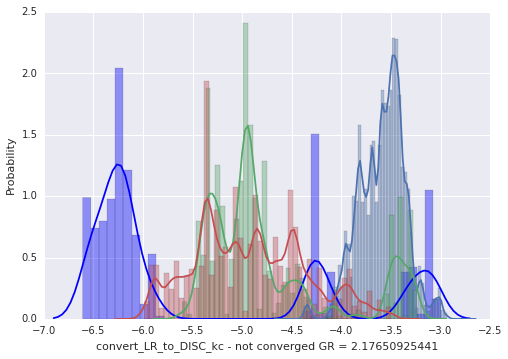

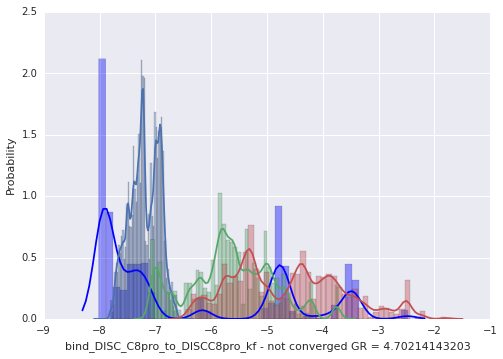

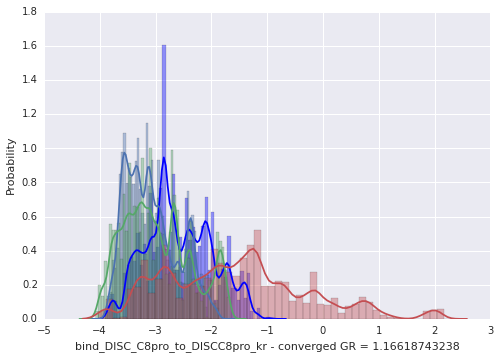

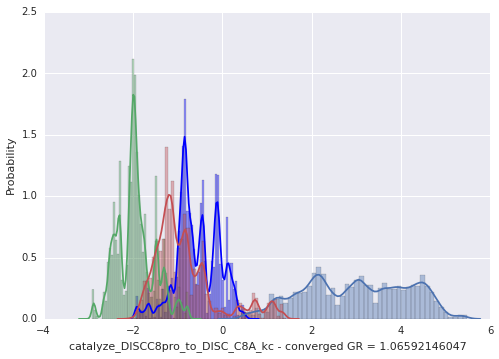

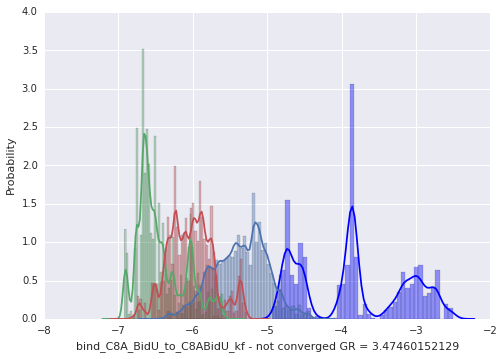

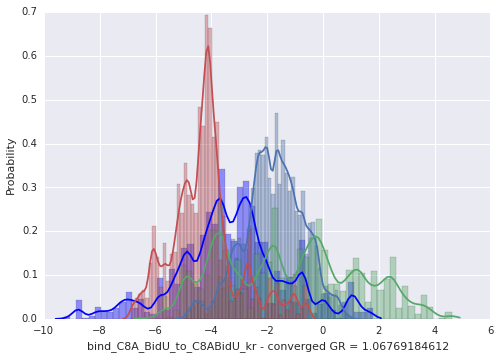

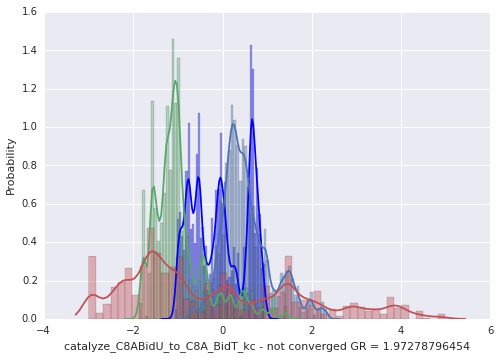

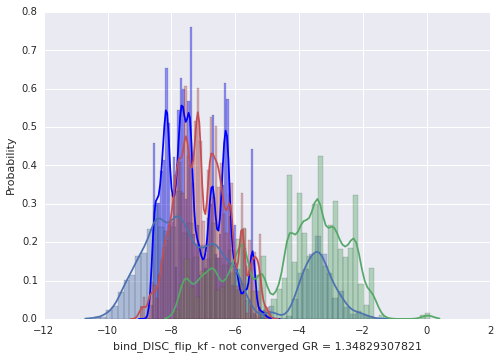

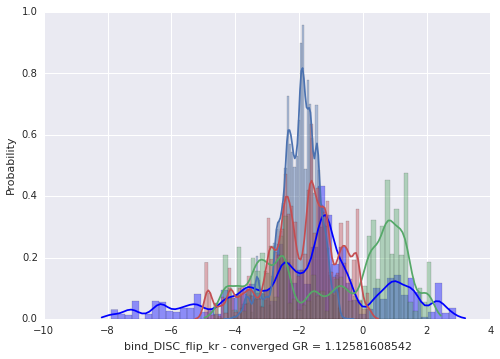

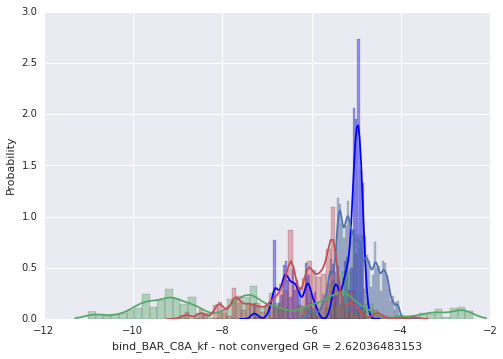

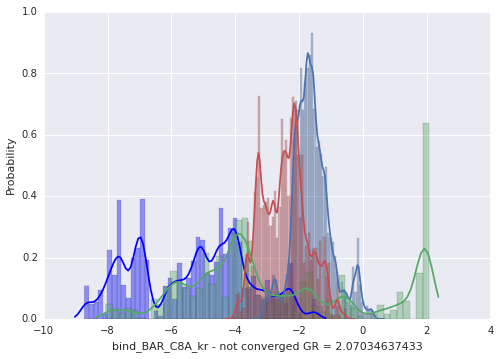

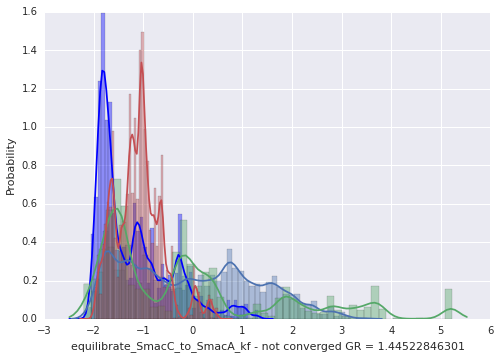

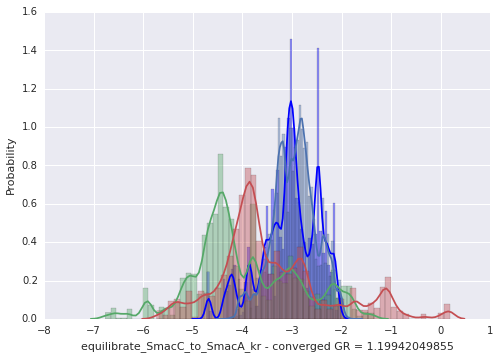

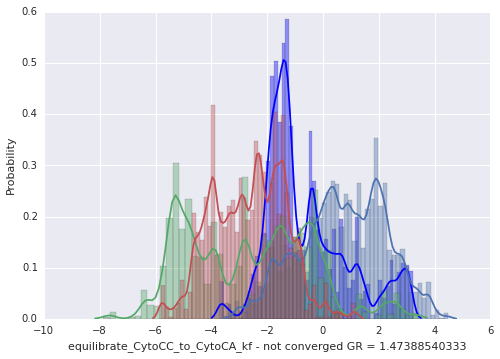

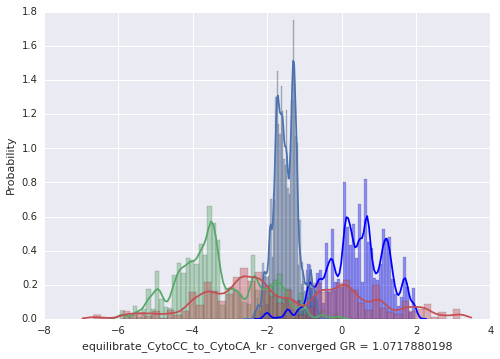

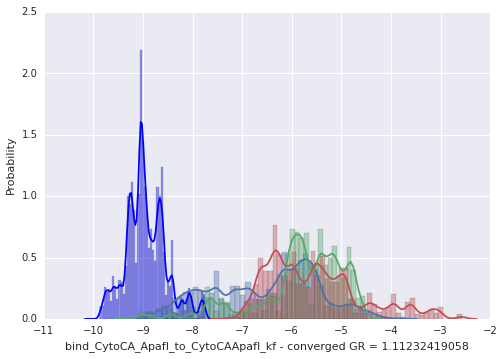

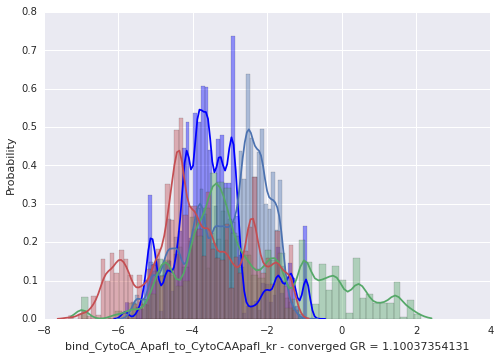

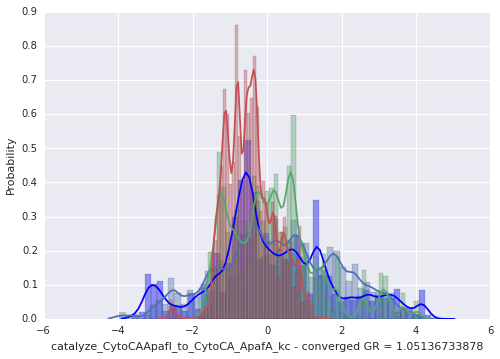

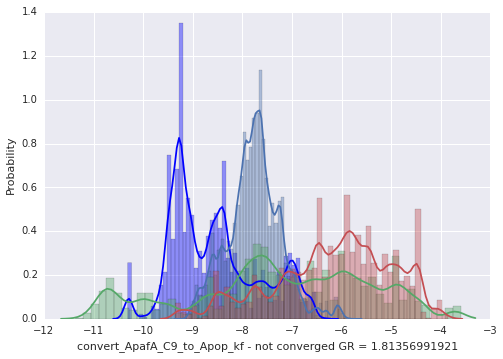

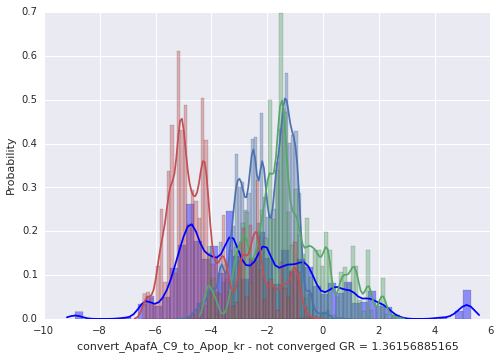

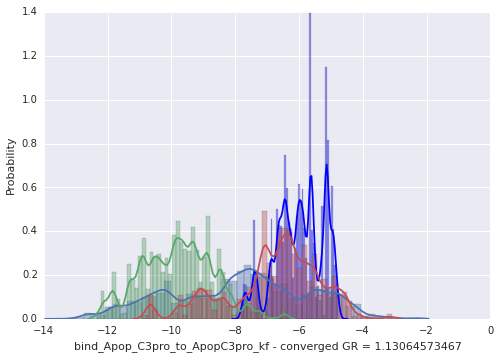

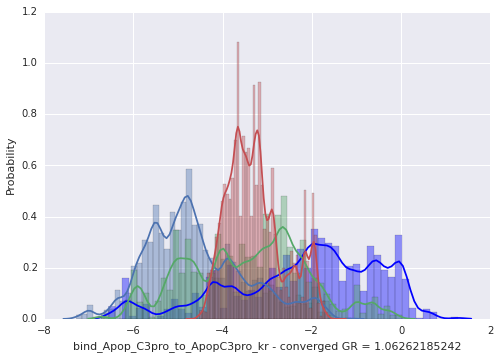

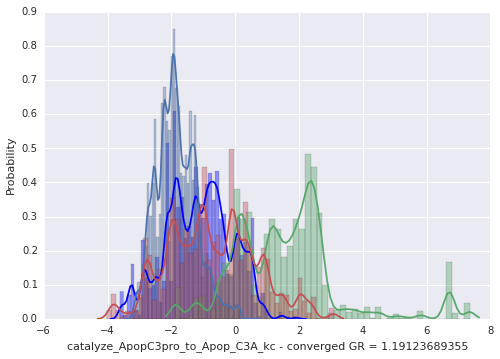

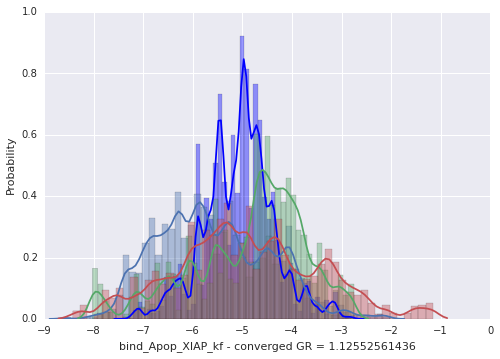

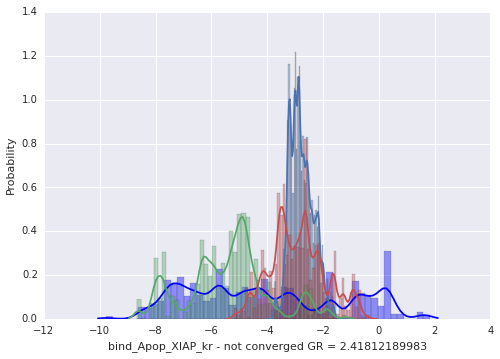

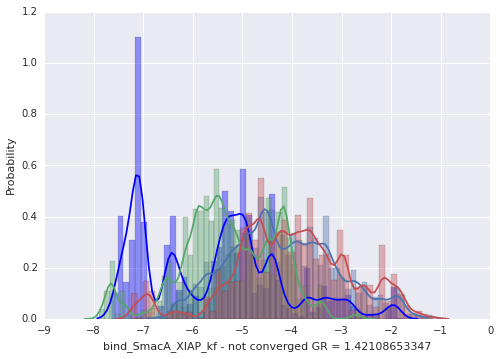

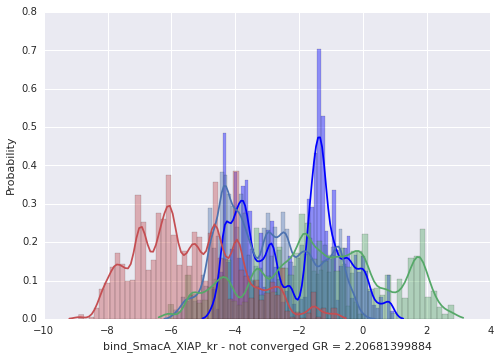

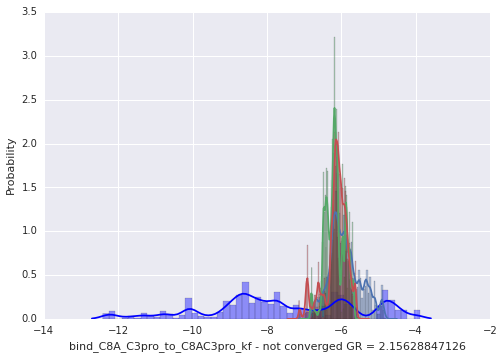

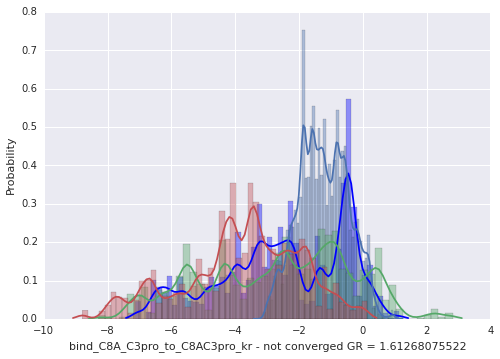

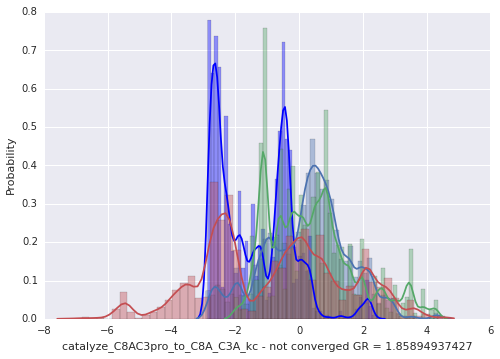

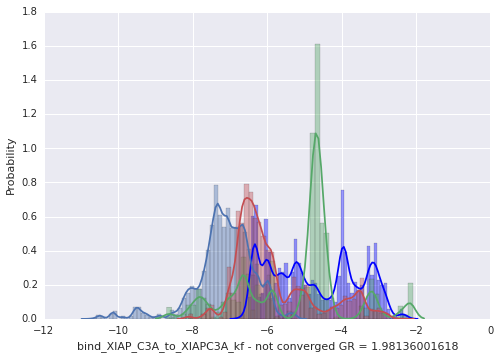

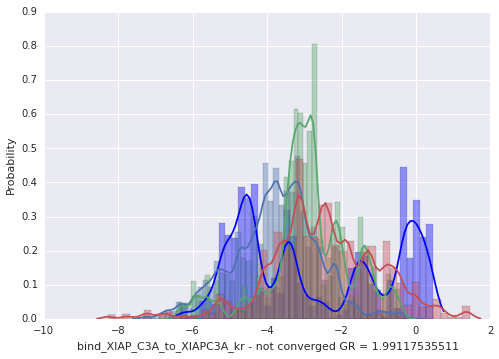

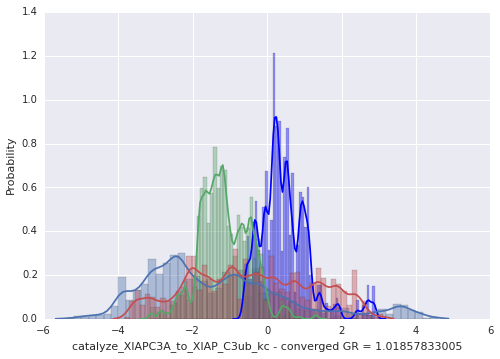

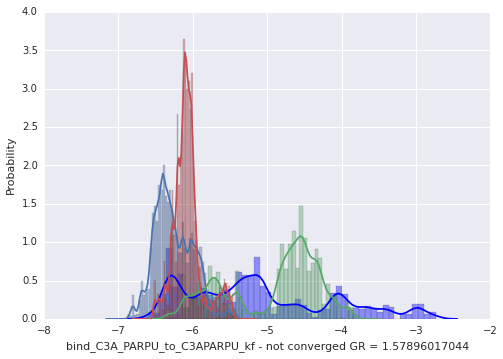

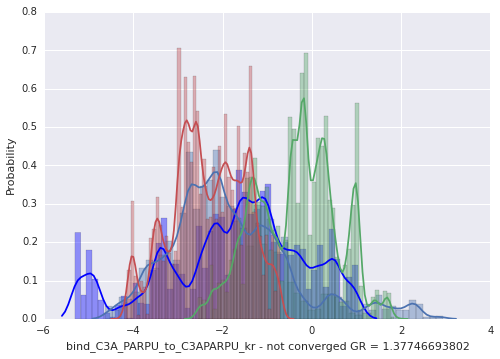

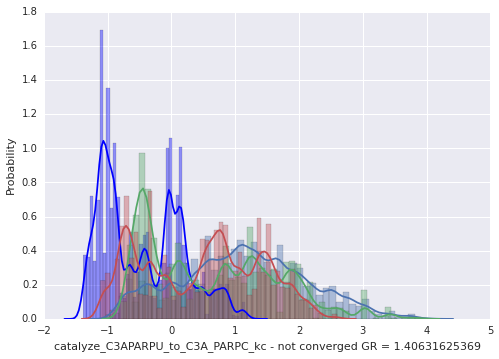

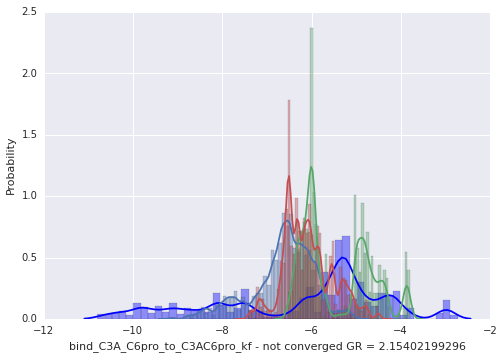

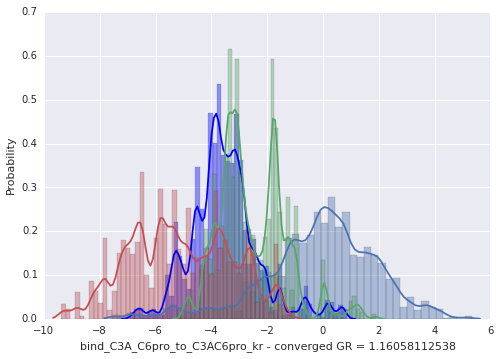

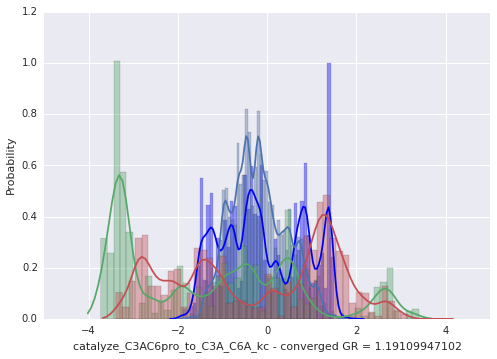

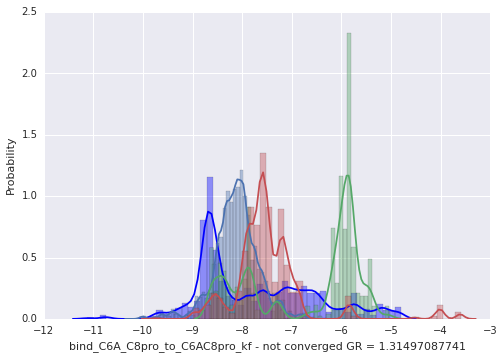

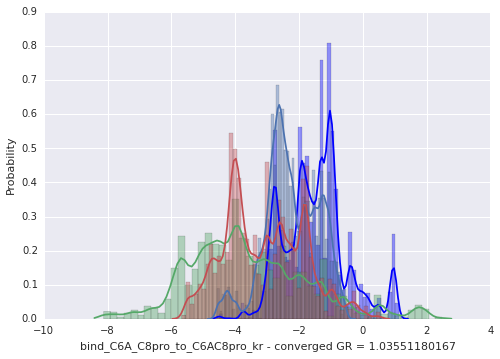

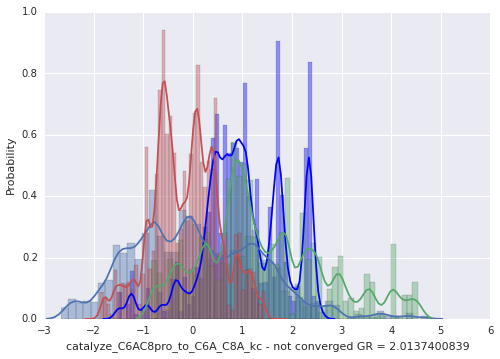

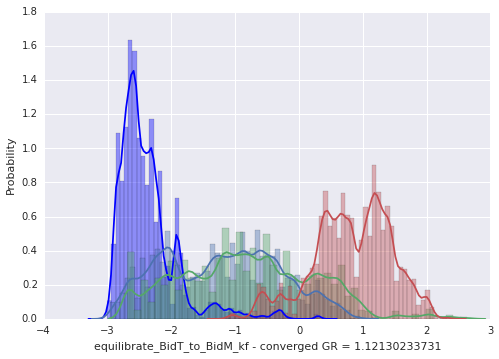

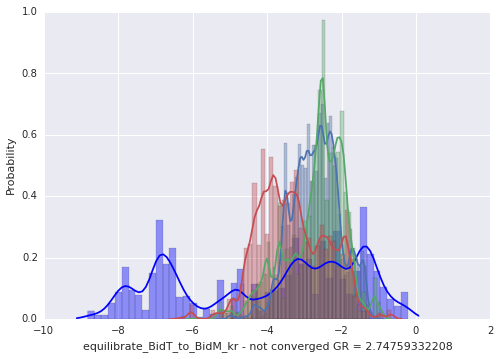

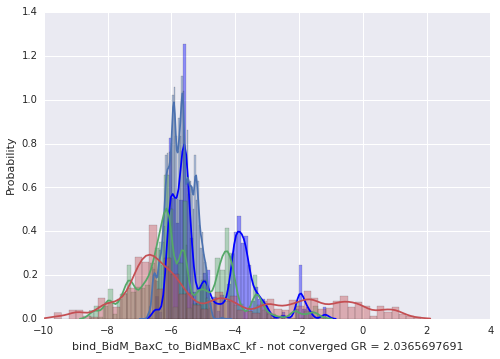

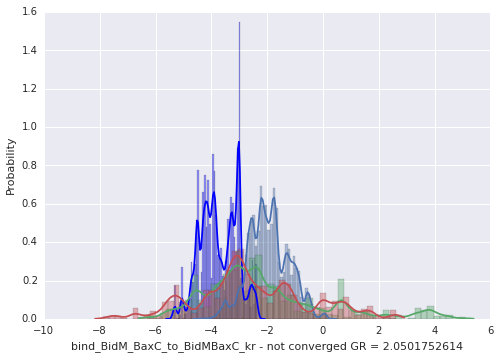

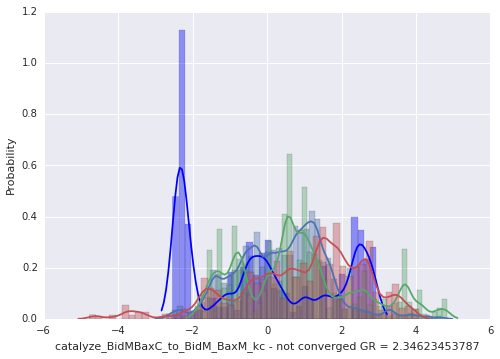

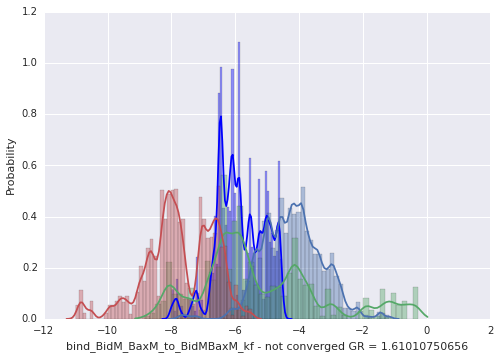

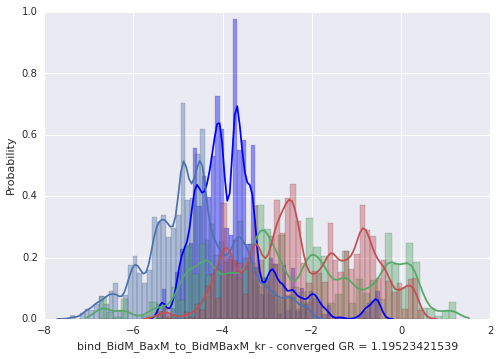

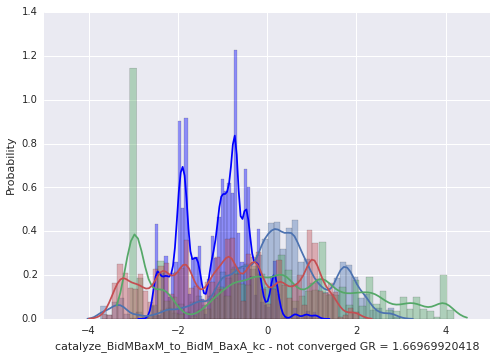

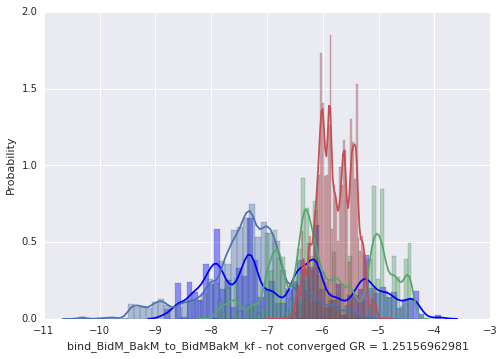

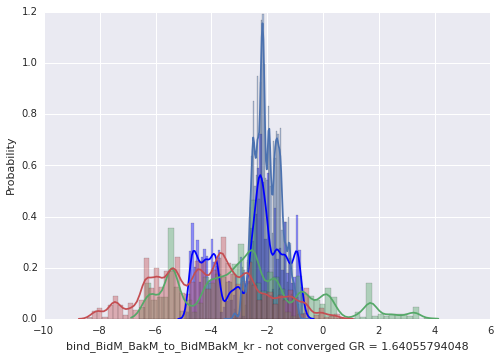

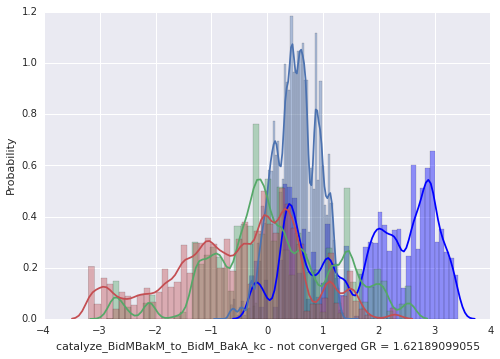

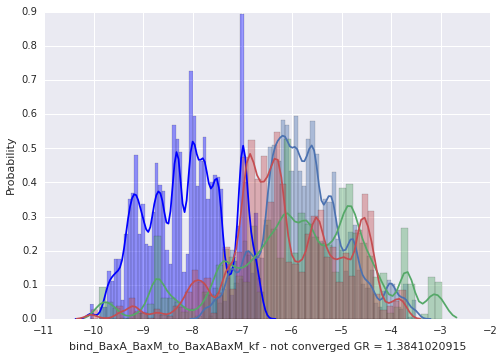

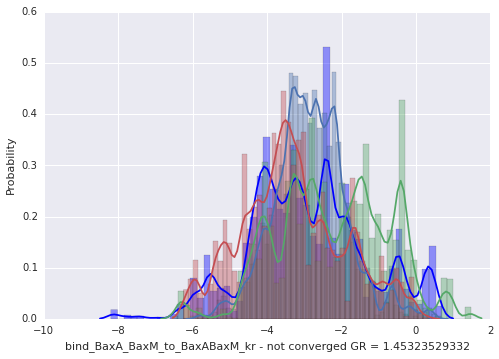

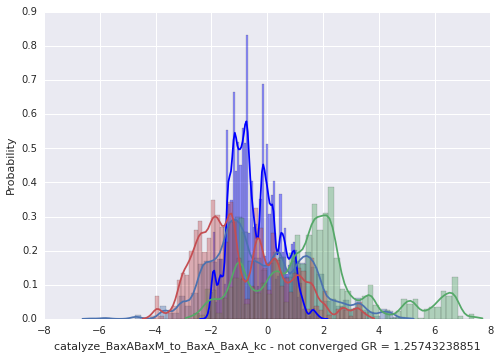

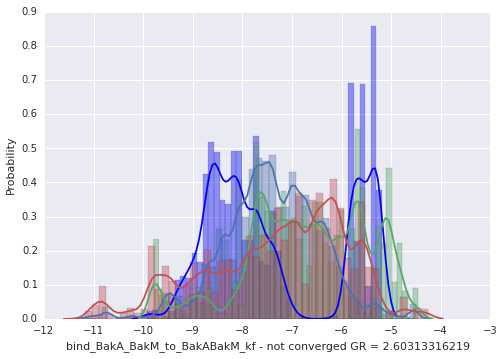

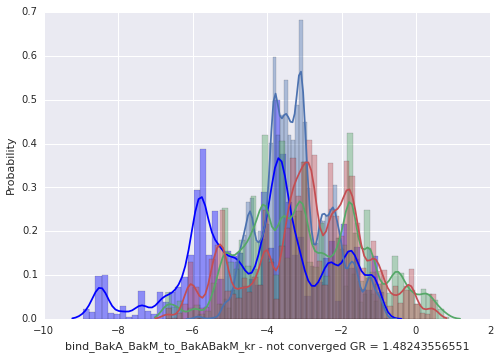

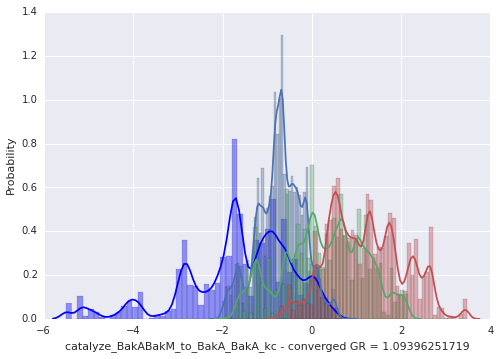

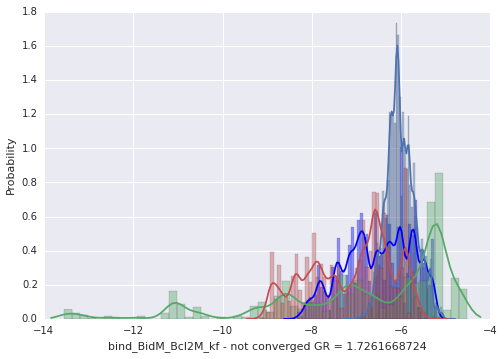

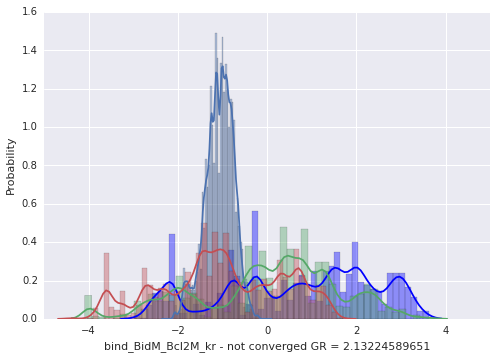

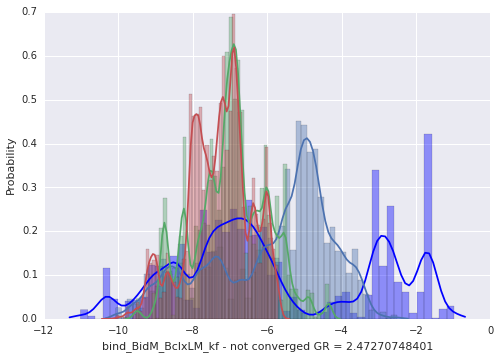

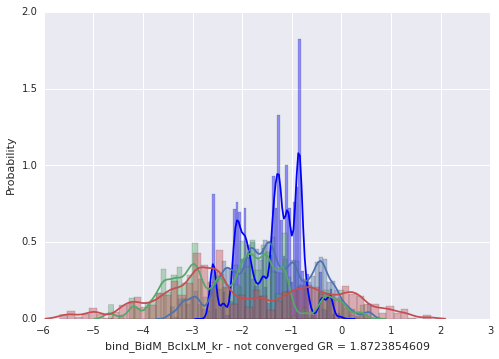

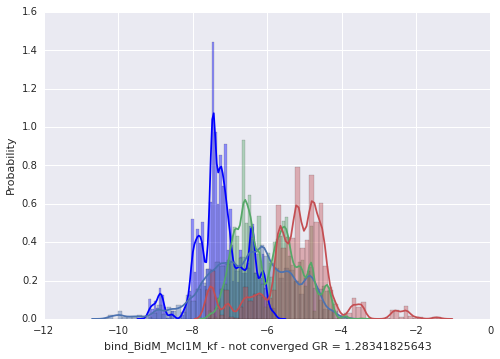

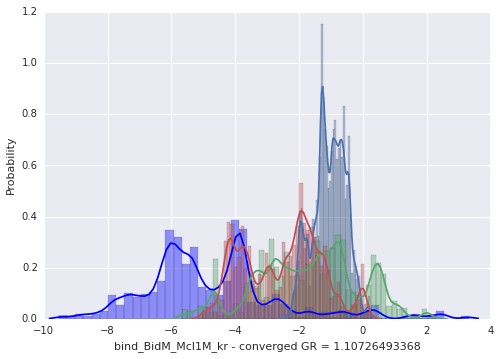

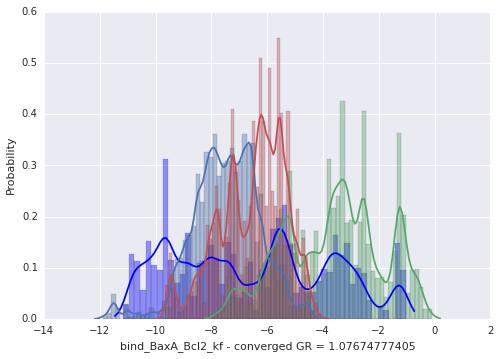

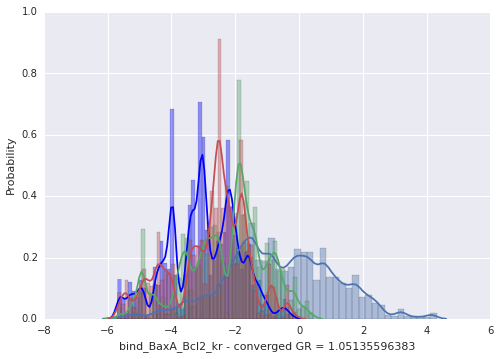

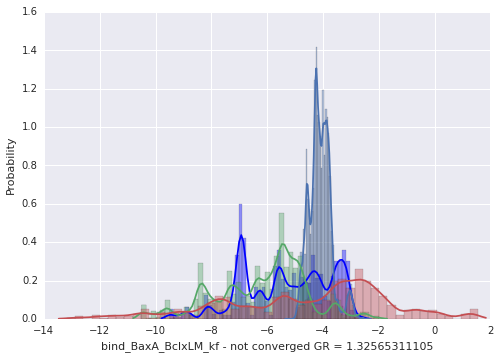

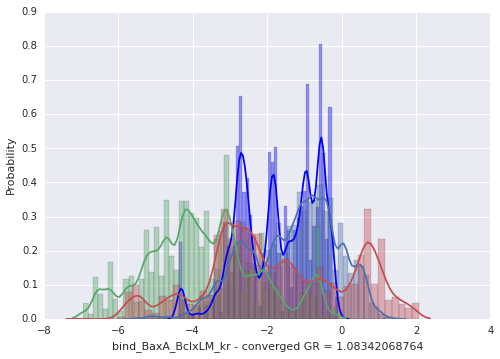

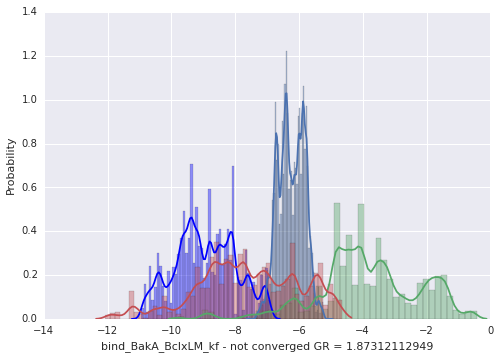

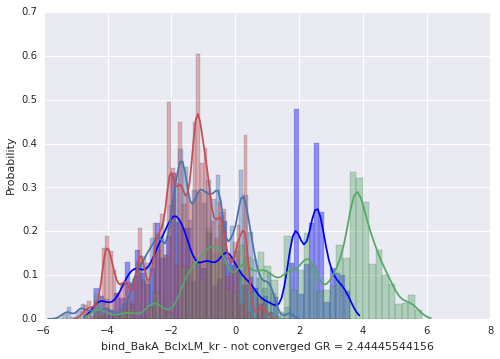

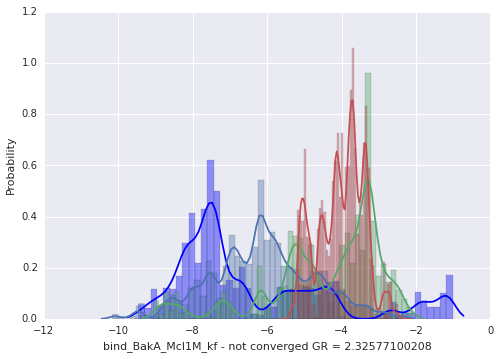

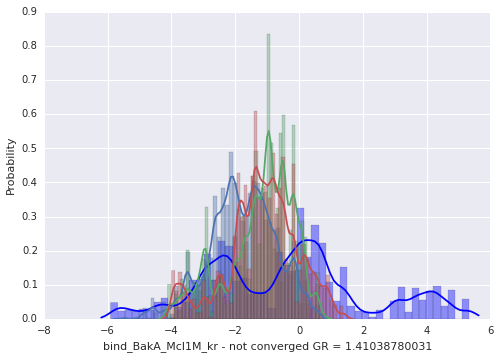

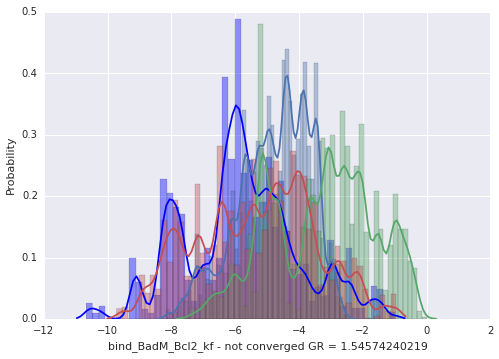

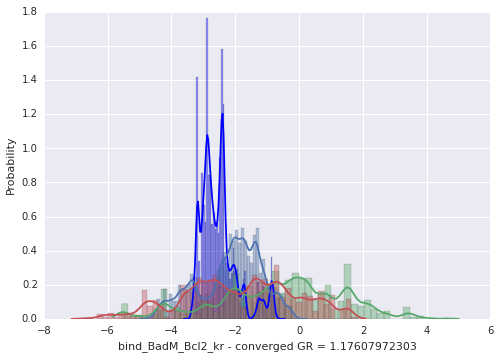

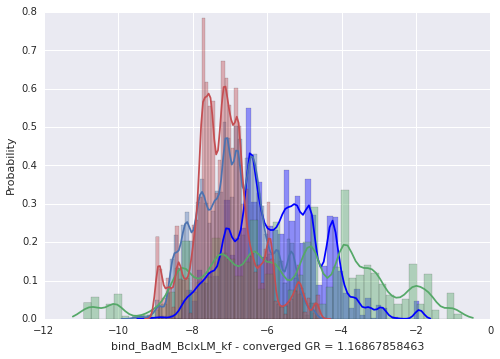

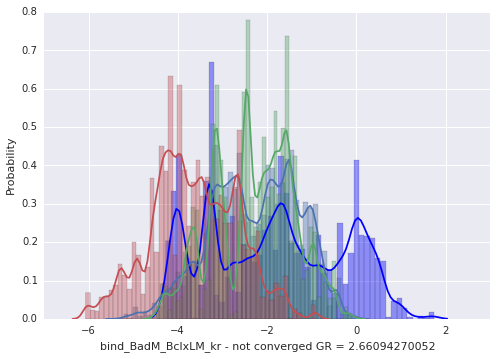

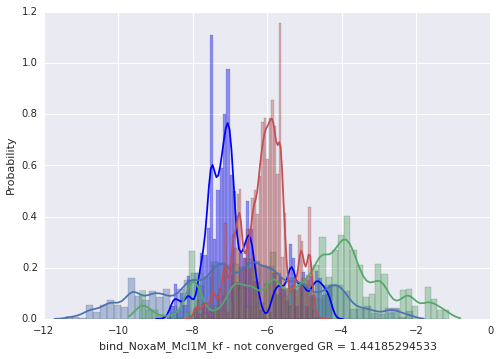

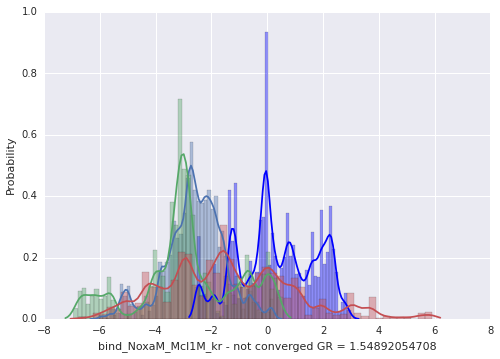

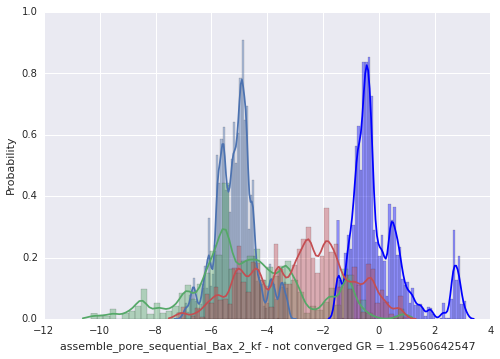

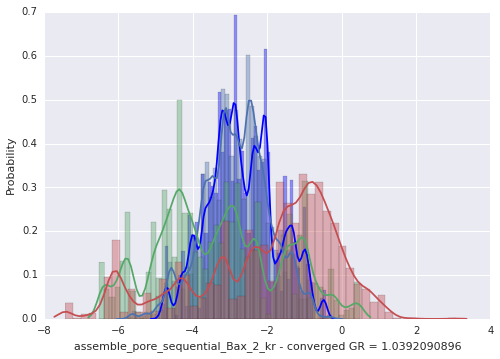

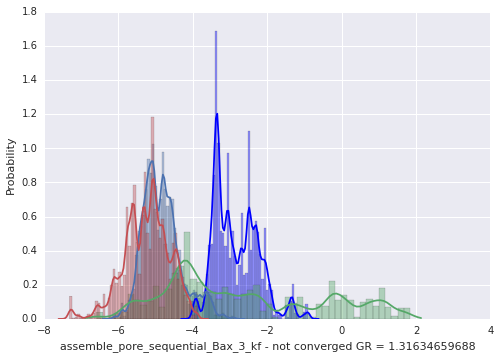

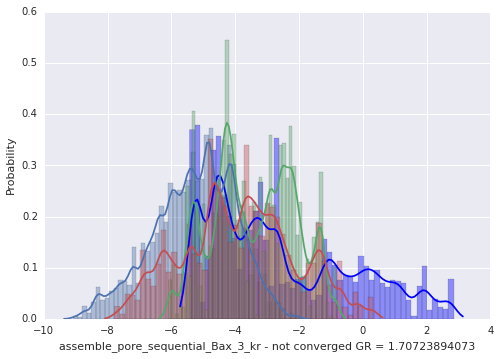

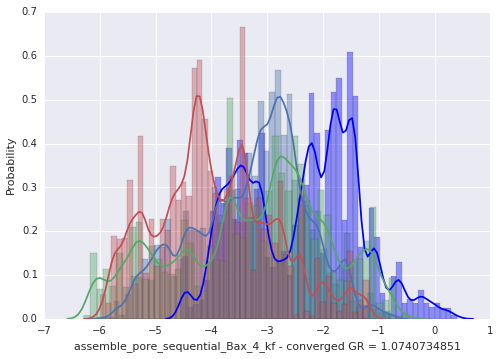

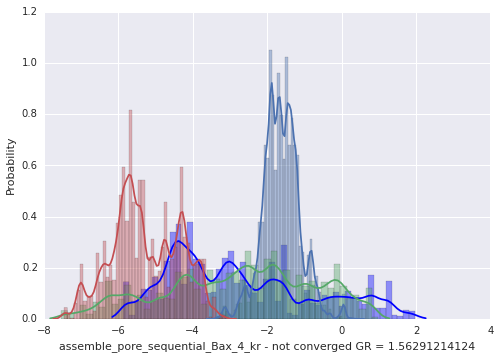

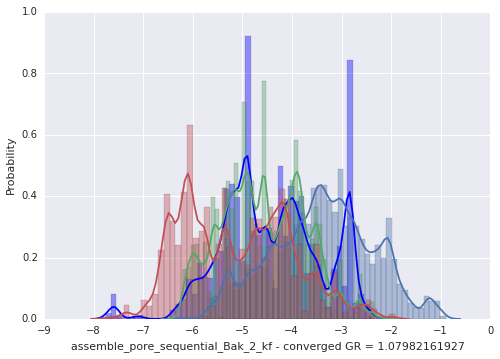

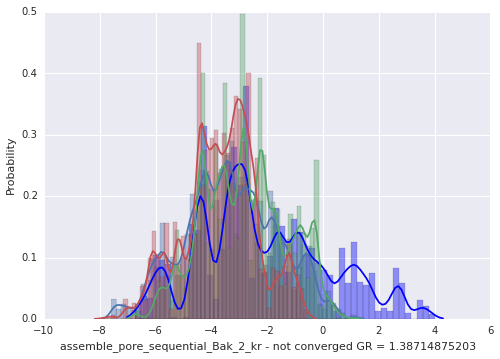

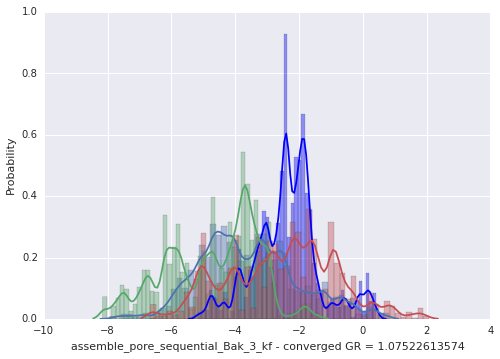

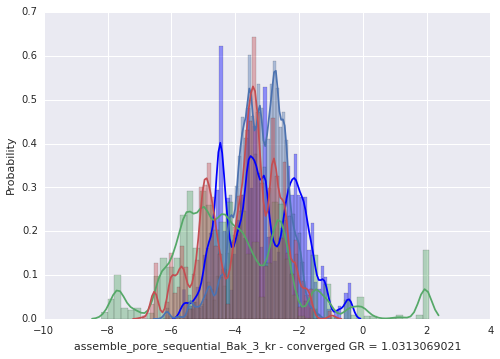

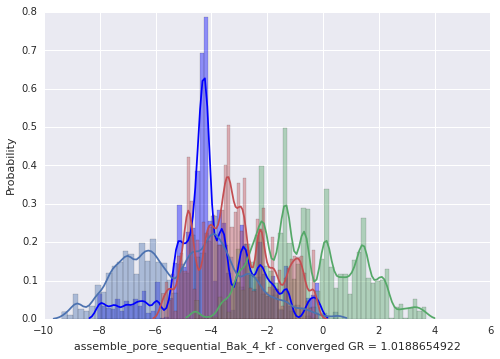

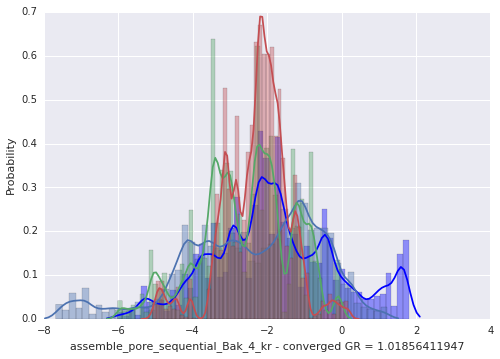

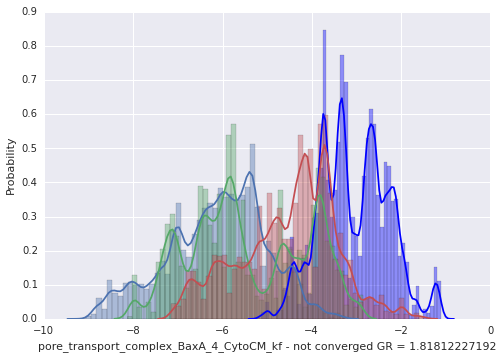

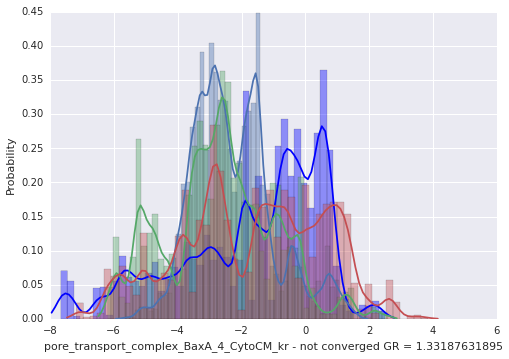

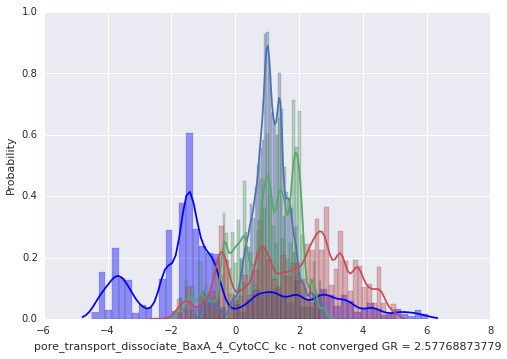

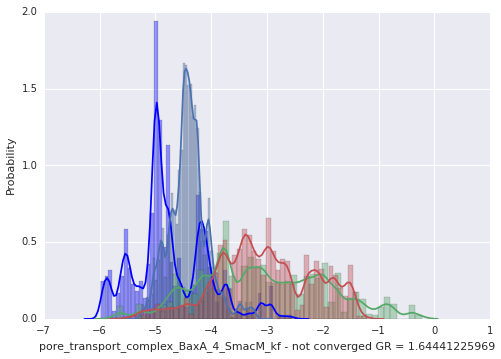

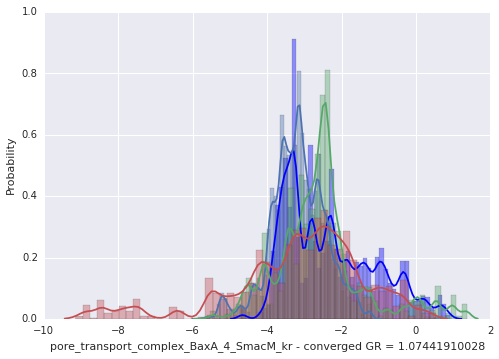

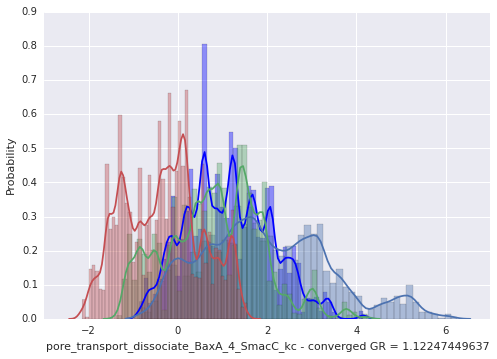

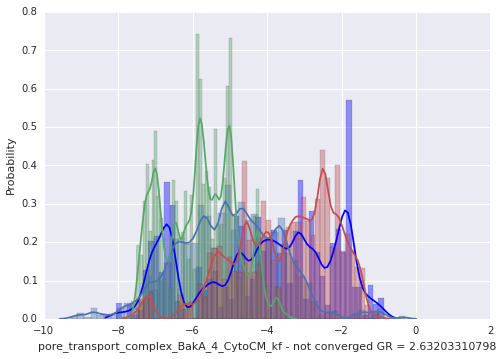

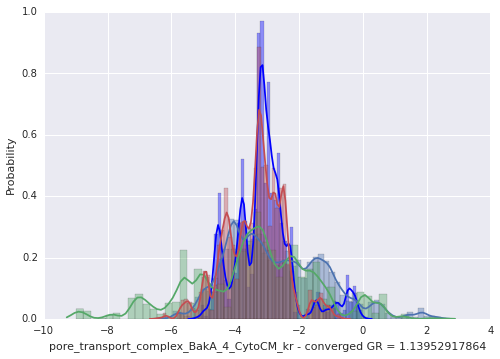

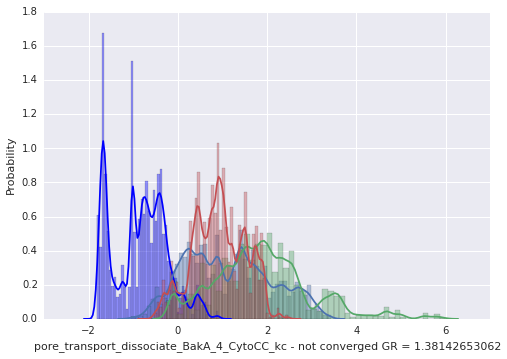

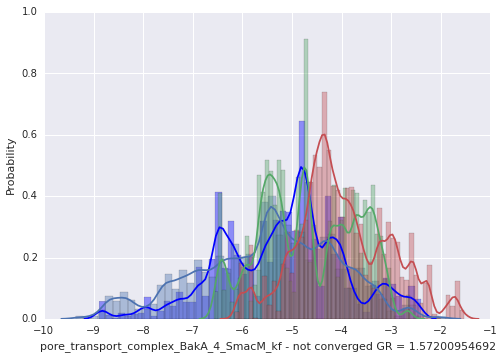

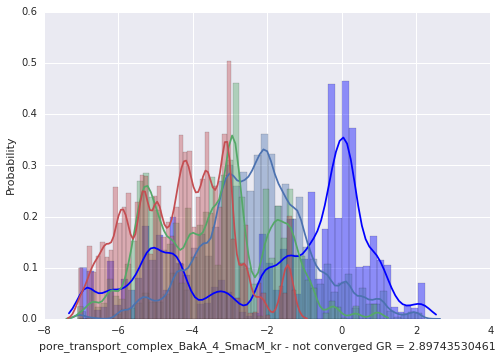

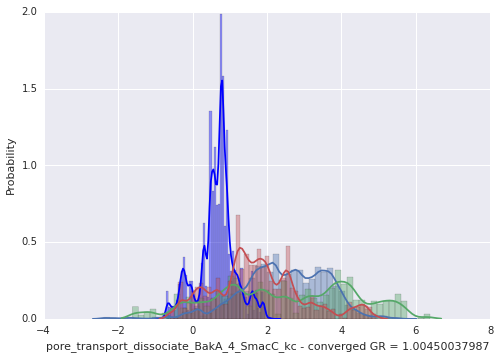

In [14]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    sns.plotting_context('notebook')
    ax = sns.distplot(trace_arr_a[:,dim], hist=True, color='b')
    sns.distplot(trace_arr_b[:,dim], hist=True)
    sns.distplot(trace_arr_c[:,dim], hist=True)
    sns.distplot(trace_arr_d[:,dim], hist=True)
    if gelman_rubin_dicts['a'][param_name] < 1.2:
        sns.axlabel(param_name+' - converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')
    else:
        sns.axlabel(param_name+' - not converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')

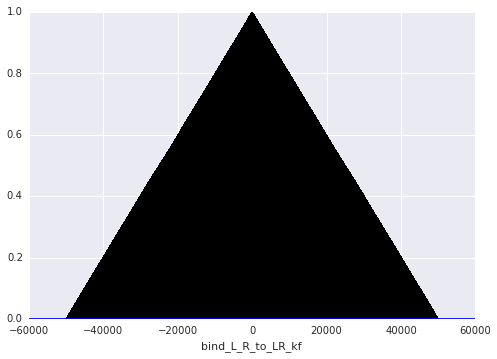

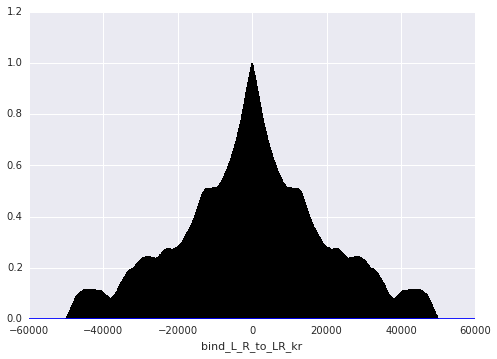

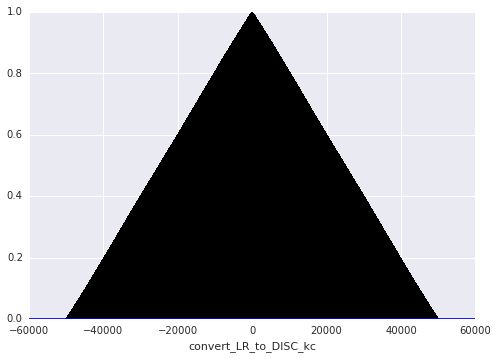

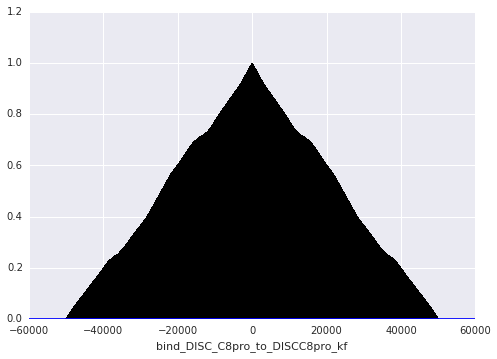

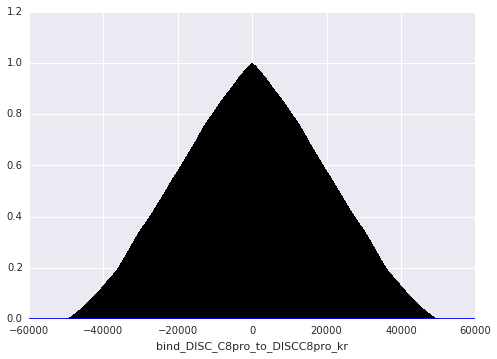

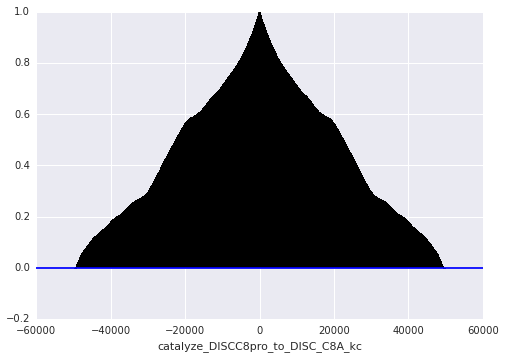

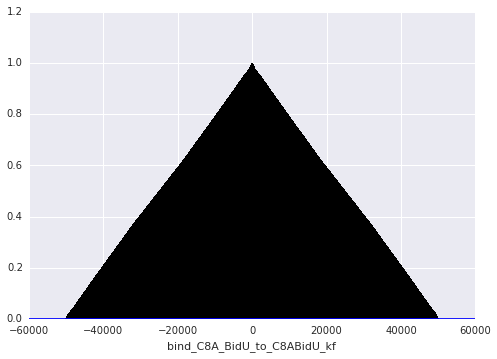

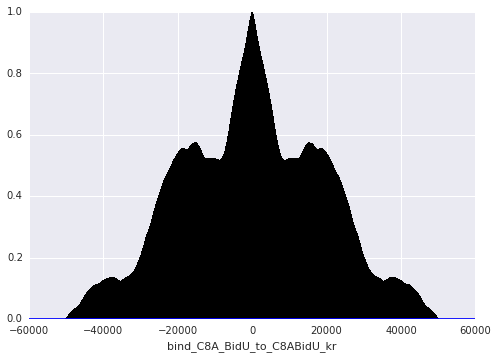

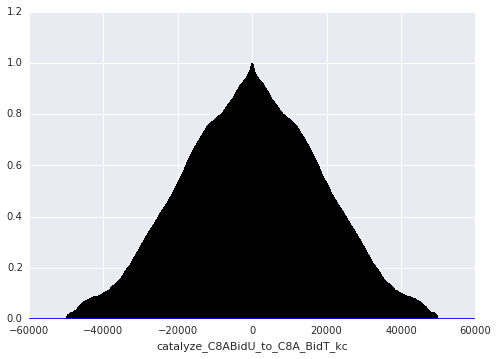

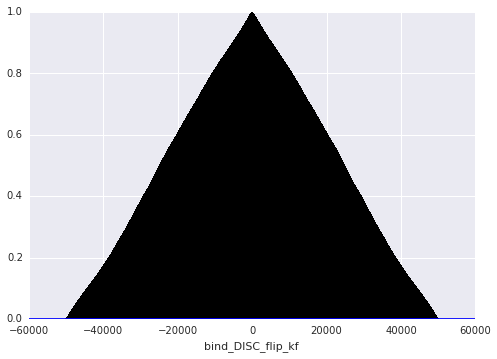

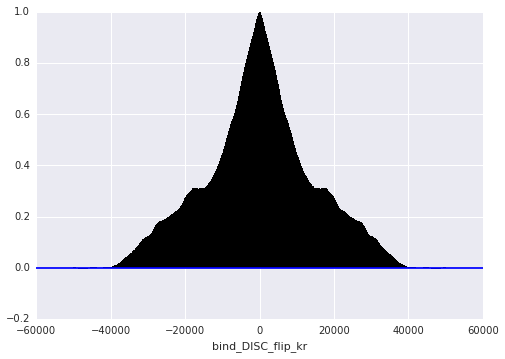

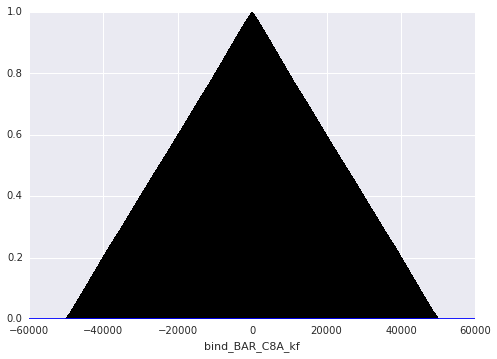

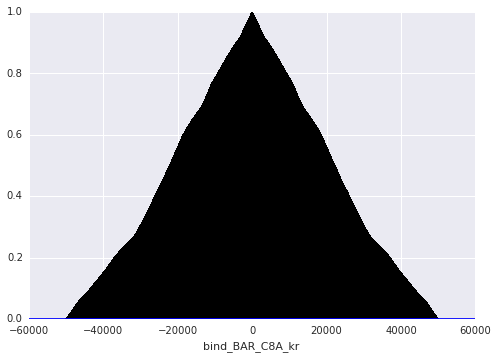

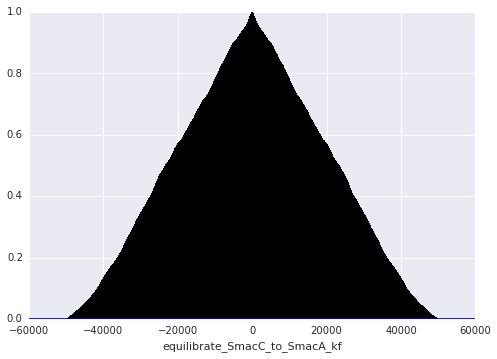

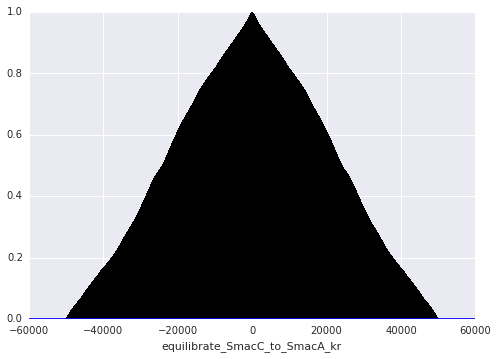

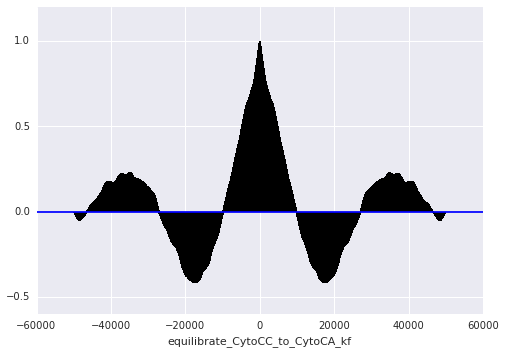

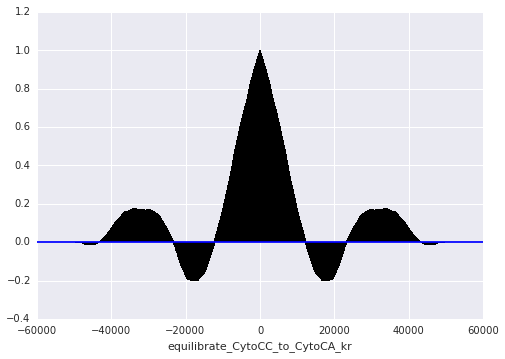

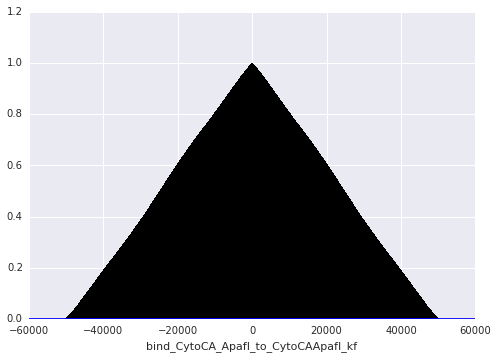

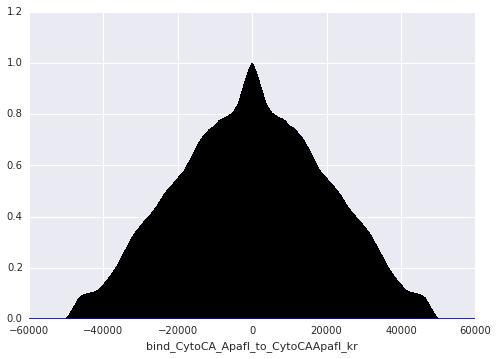

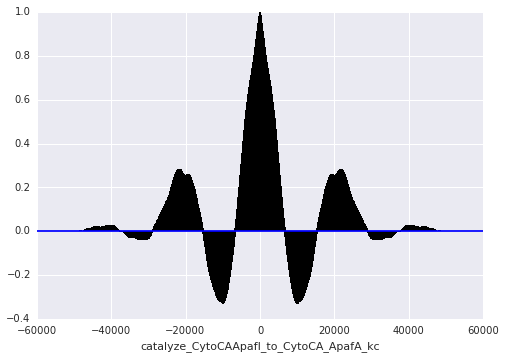

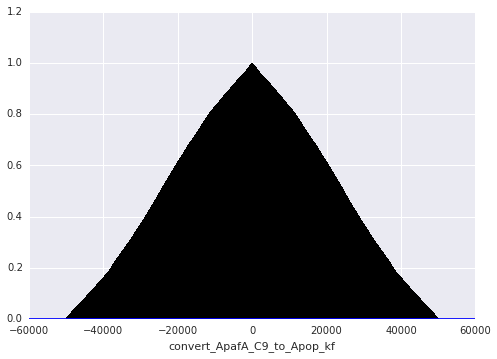

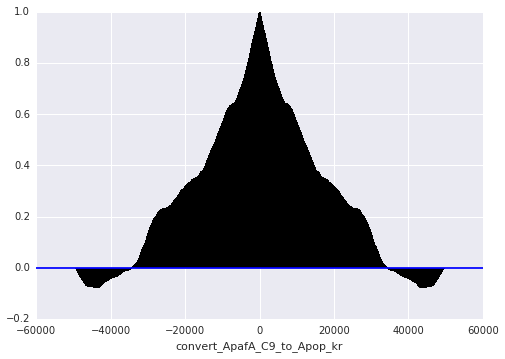

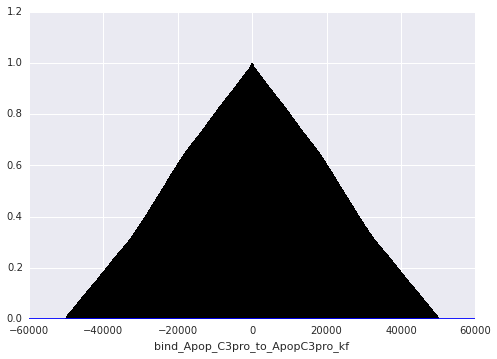

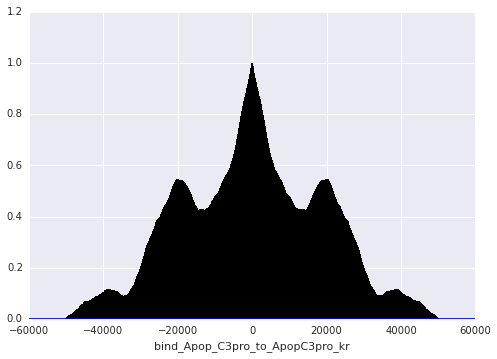

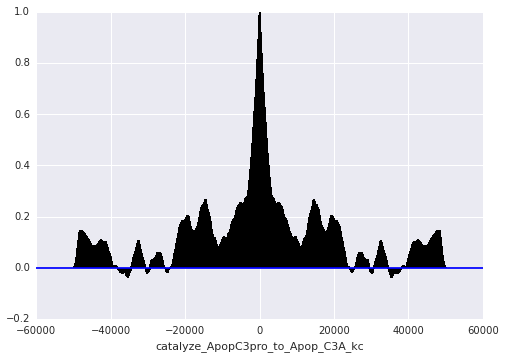

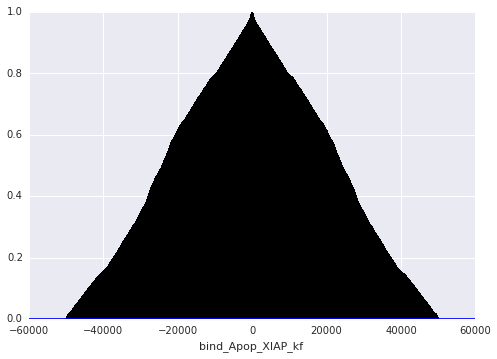

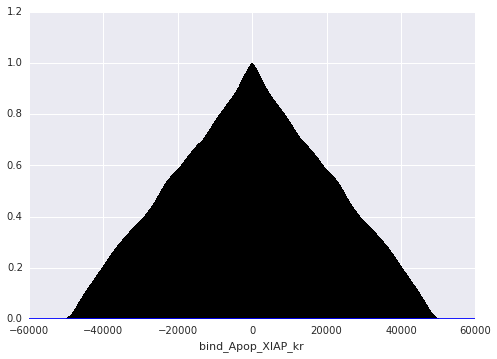

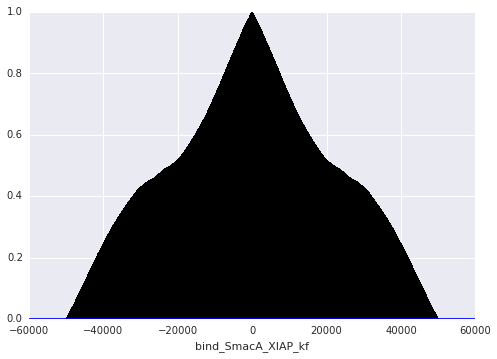

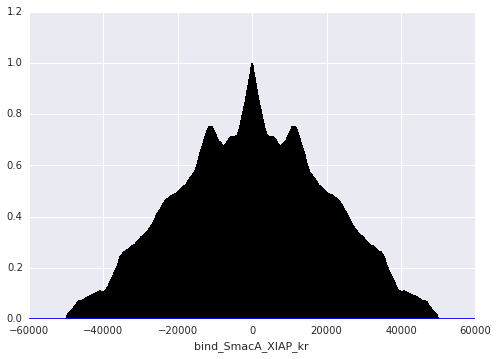

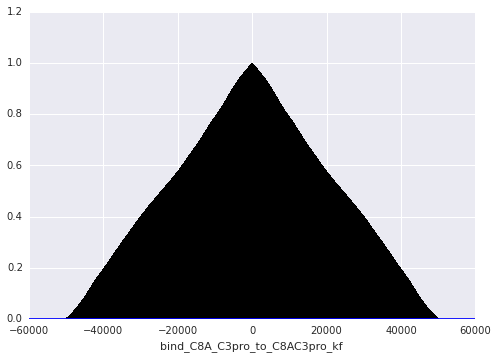

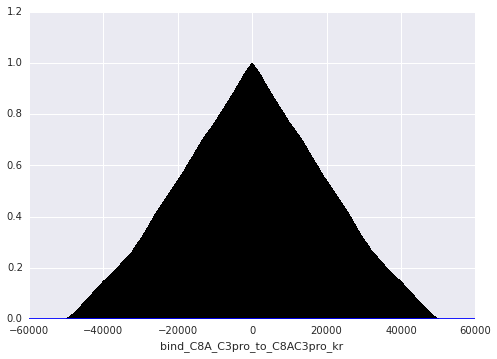

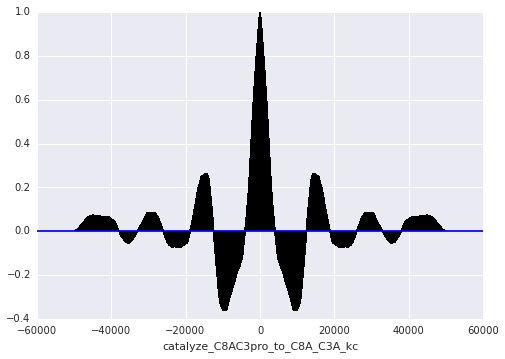

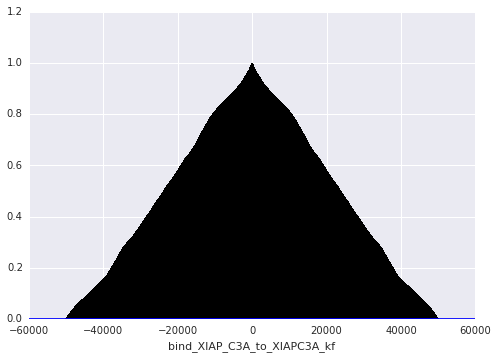

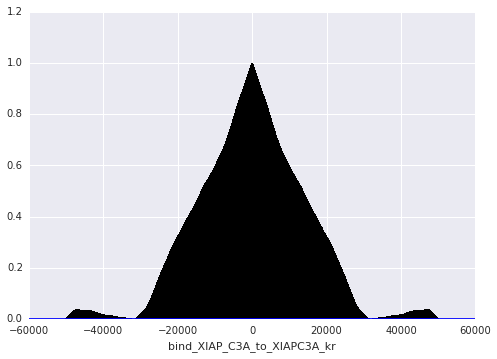

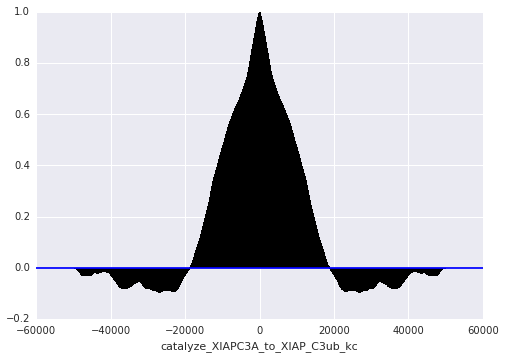

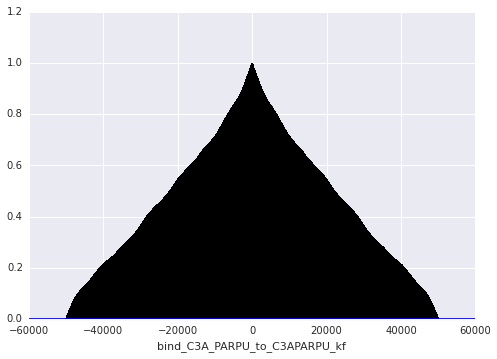

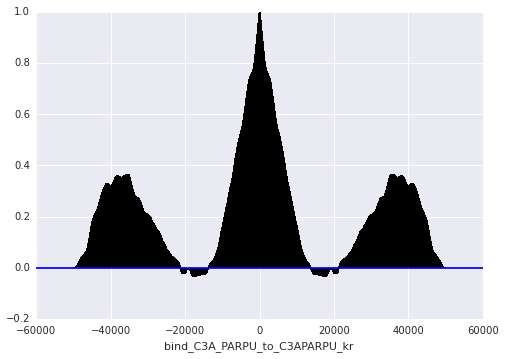

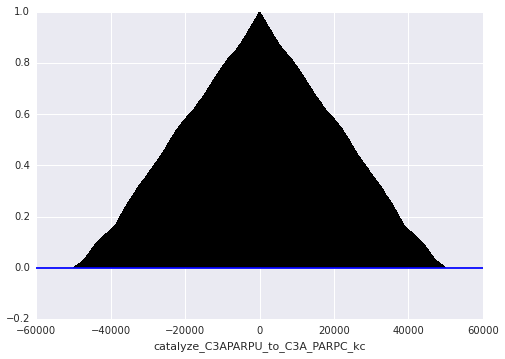

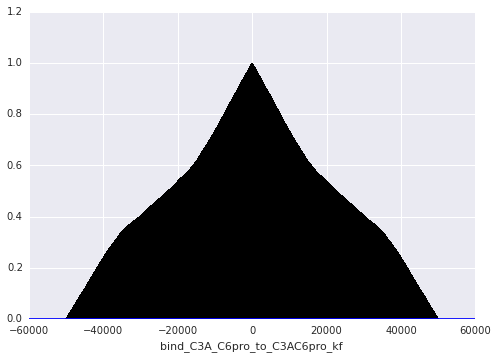

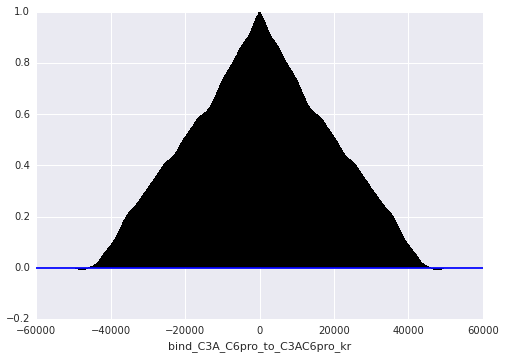

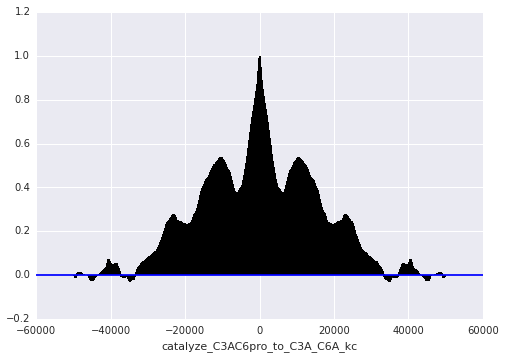

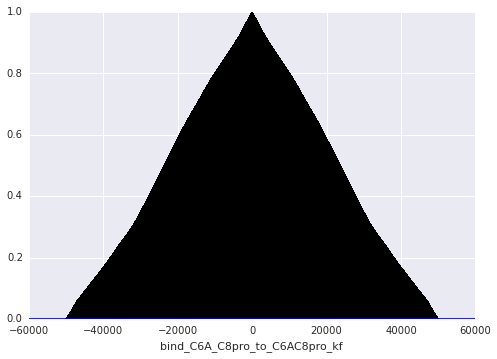

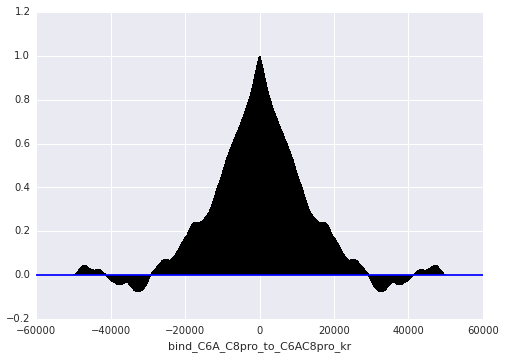

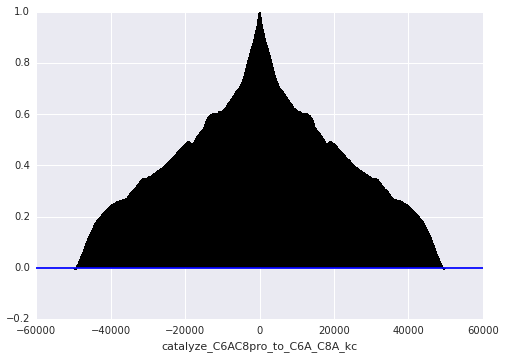

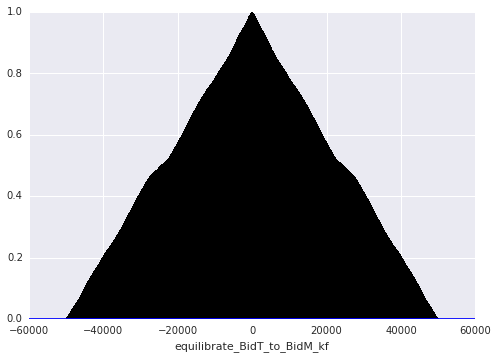

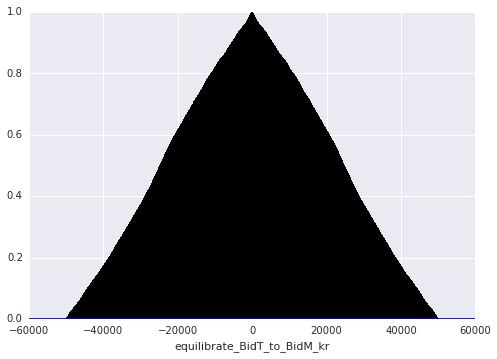

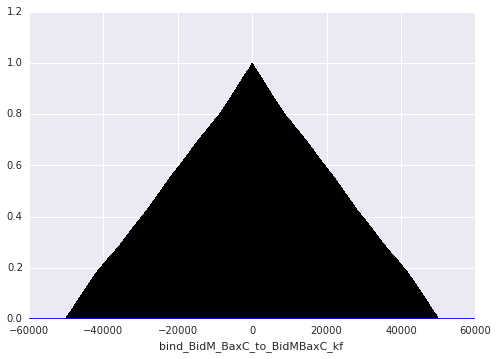

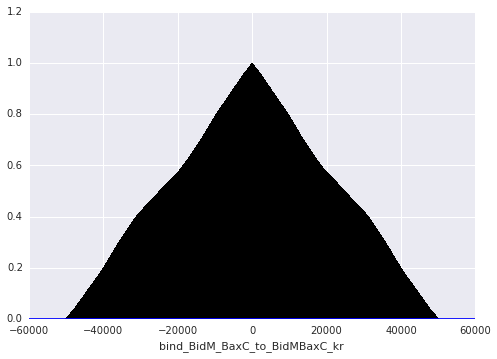

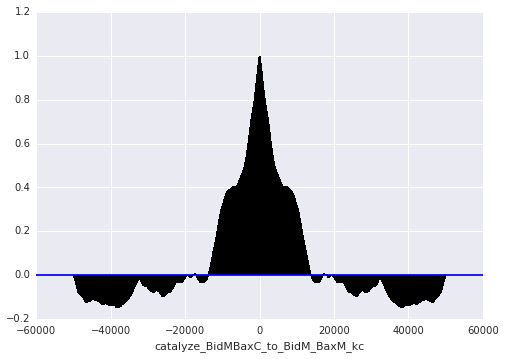

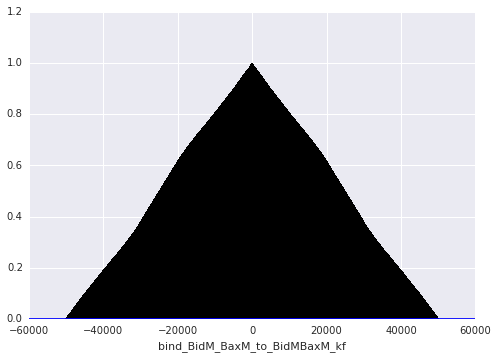

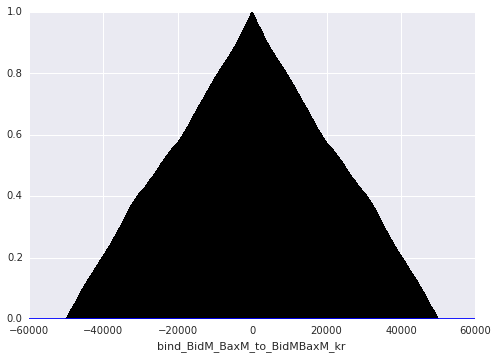

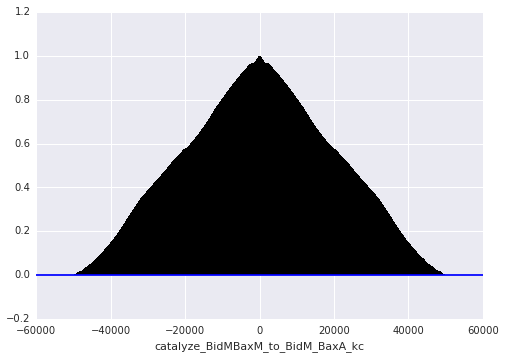

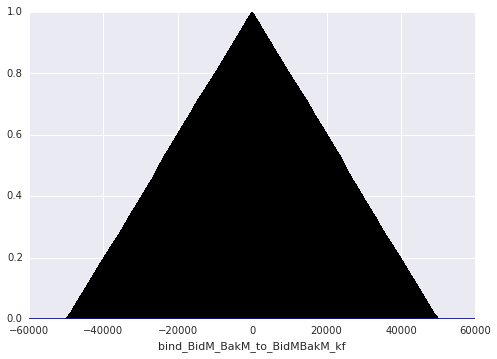

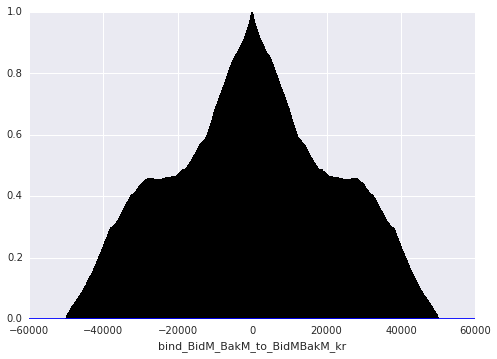

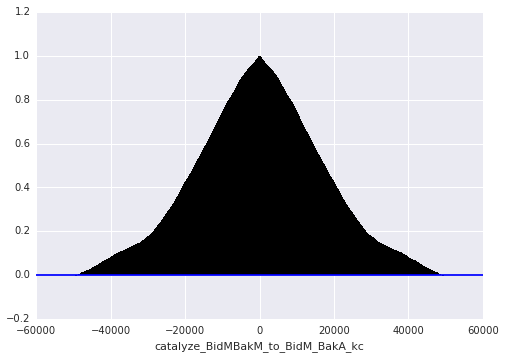

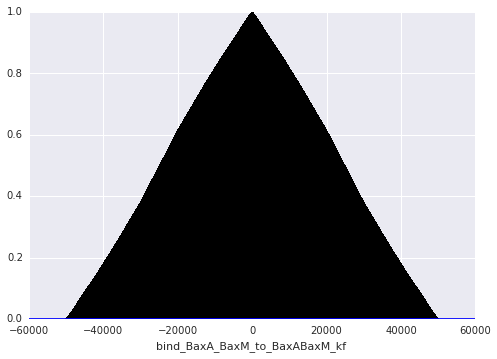

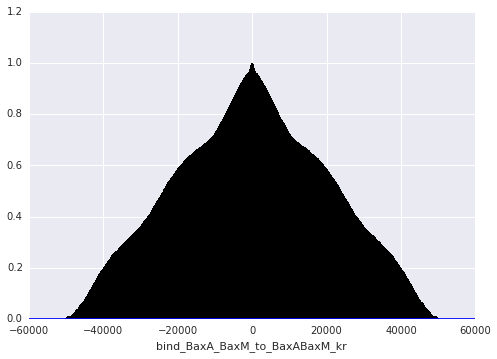

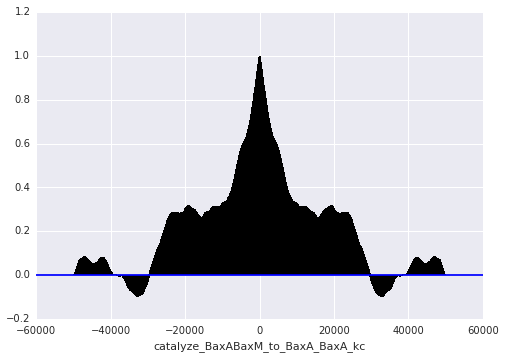

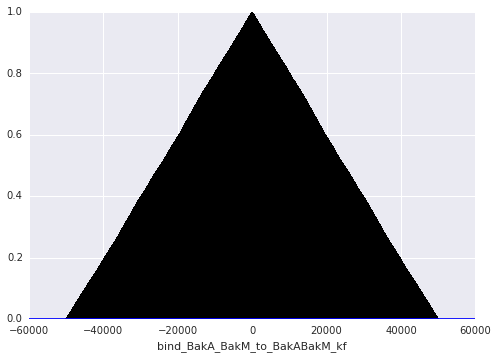

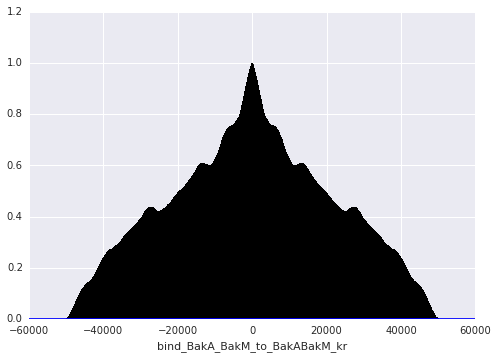

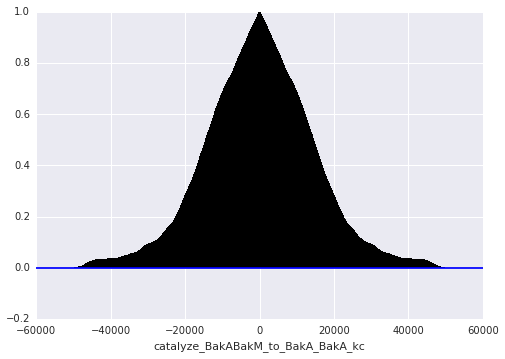

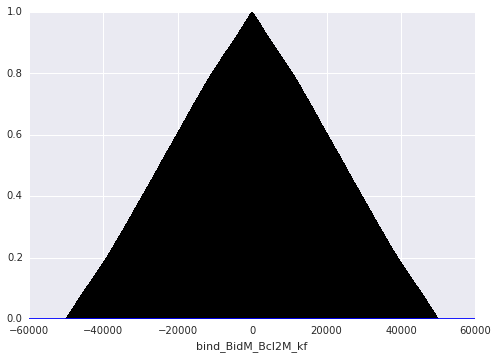

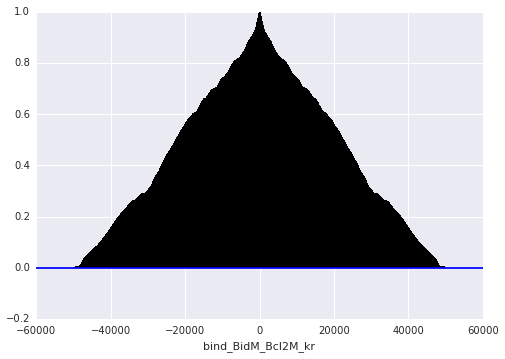

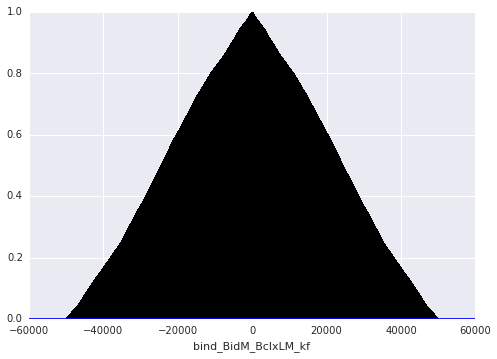

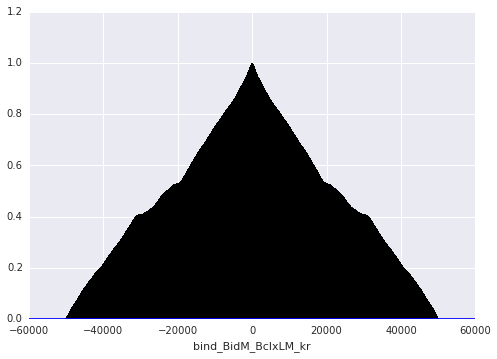

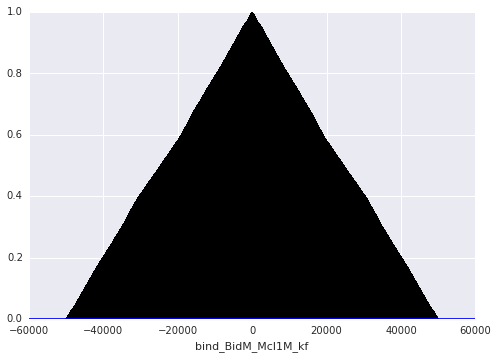

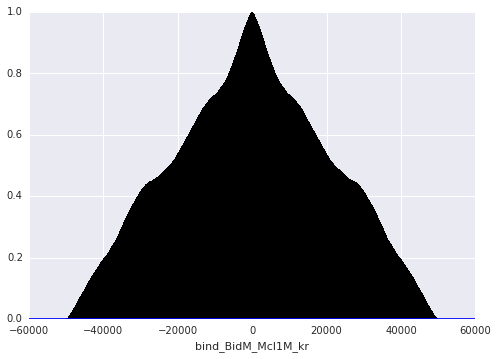

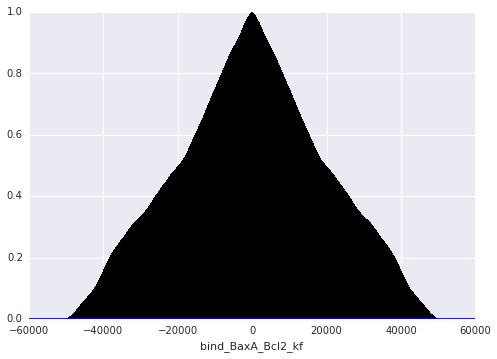

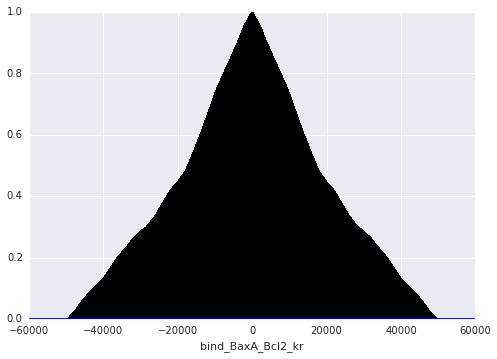

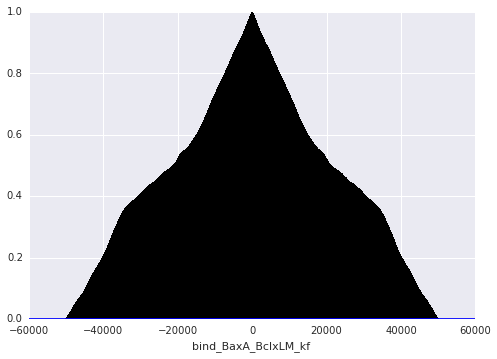

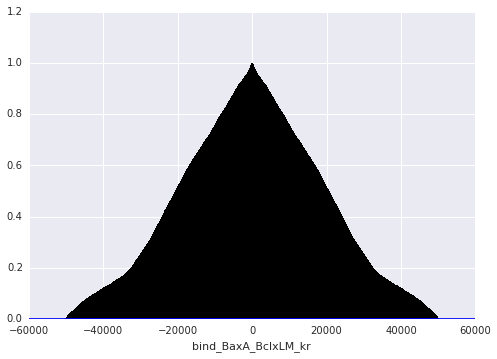

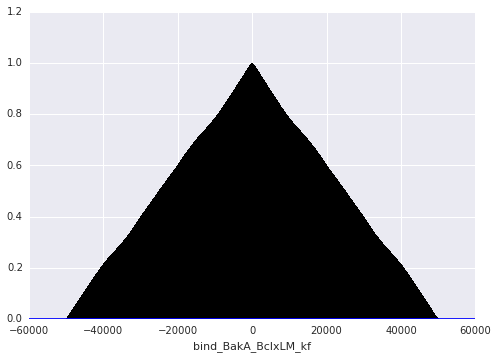

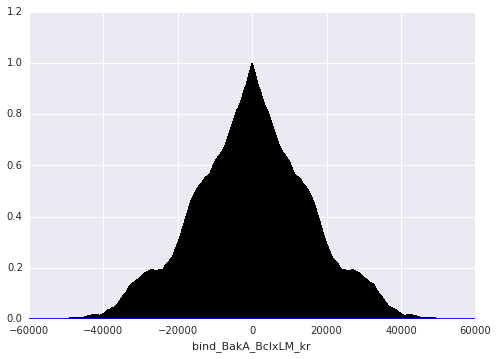

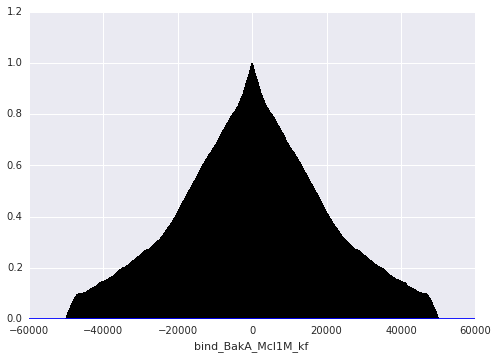

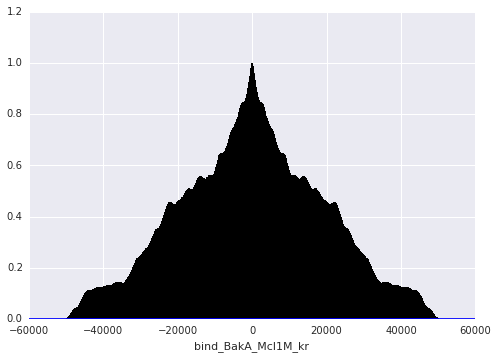

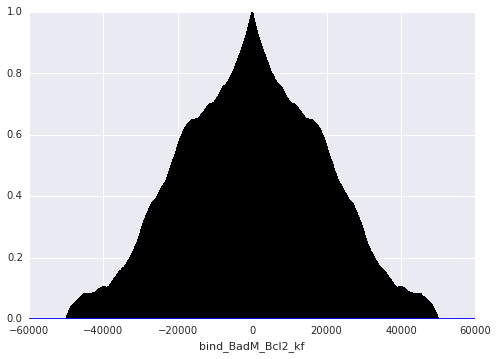

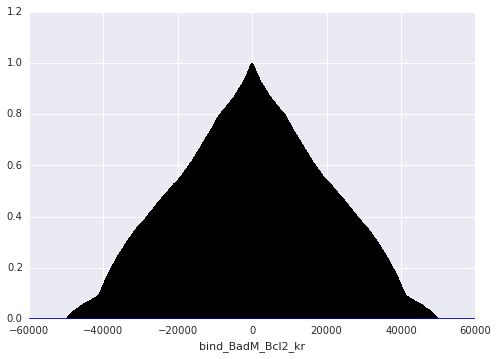

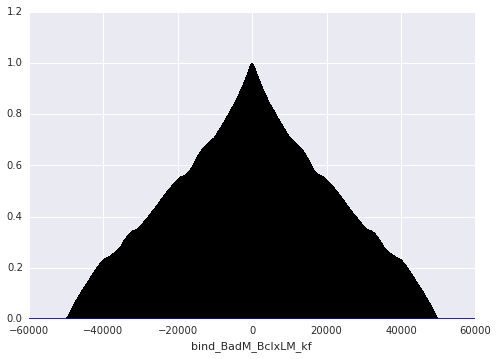

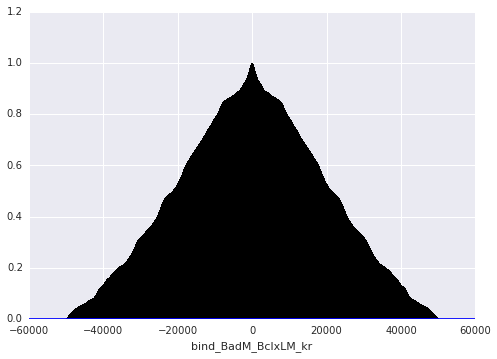

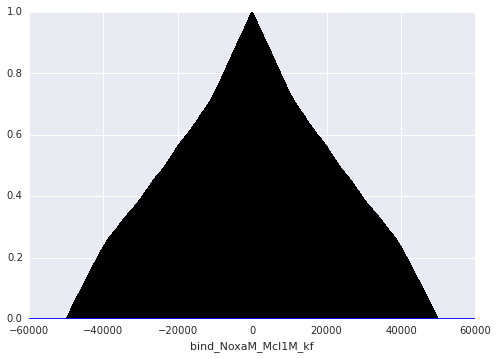

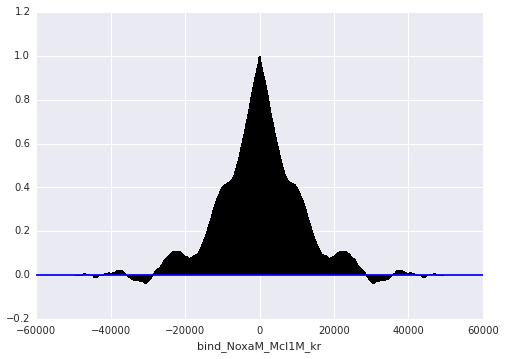

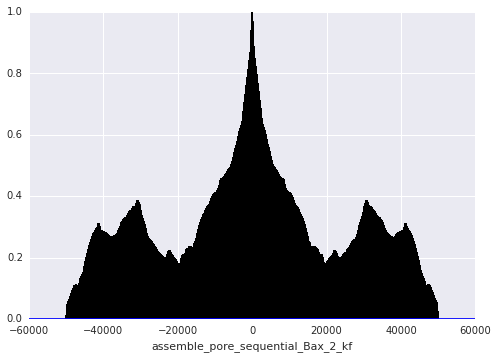

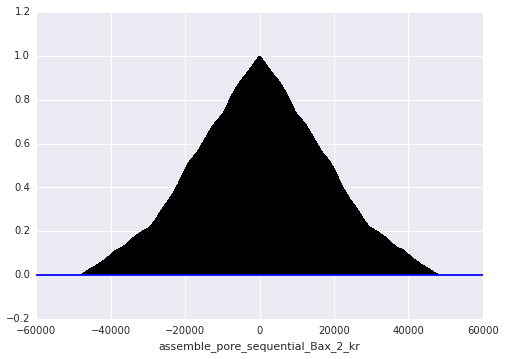

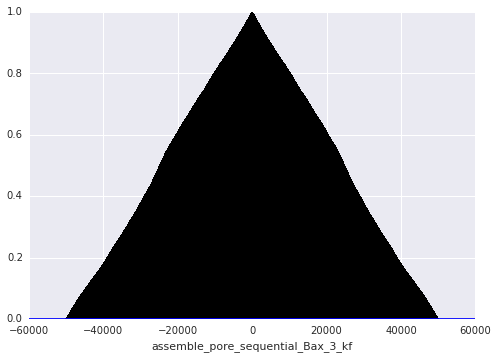

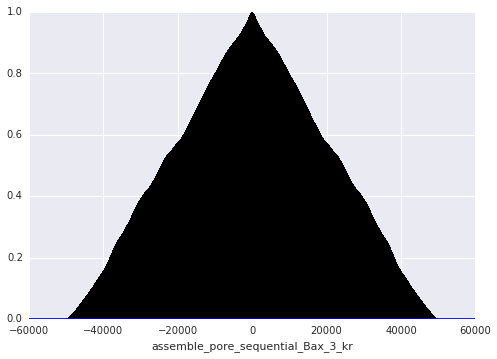

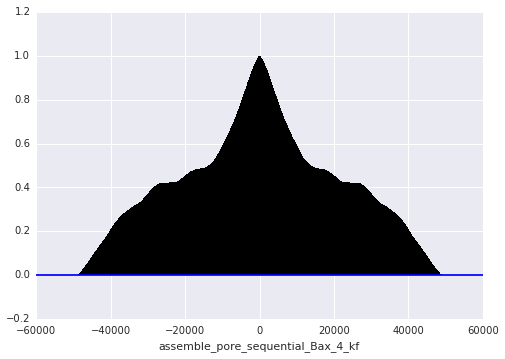

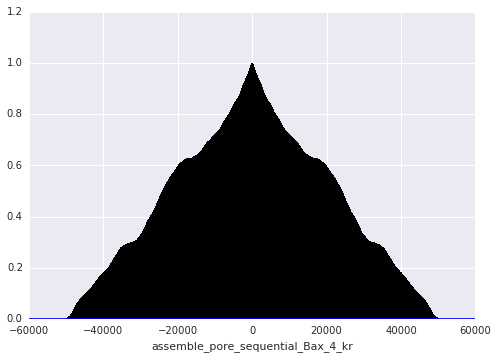

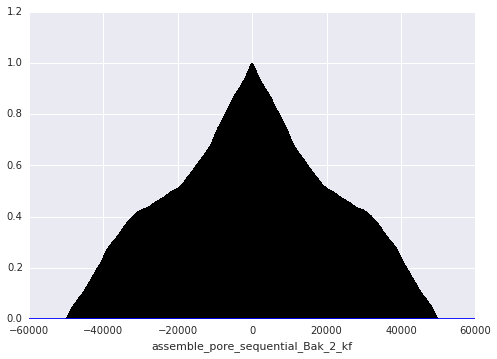

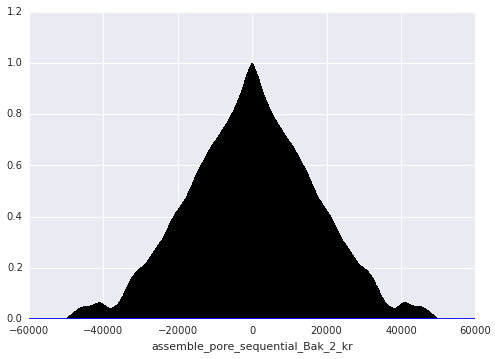

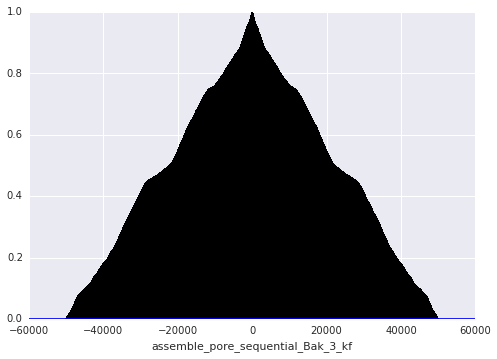

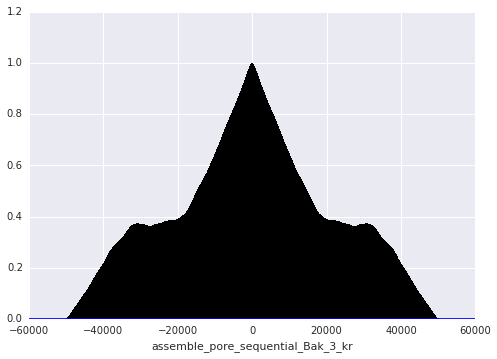

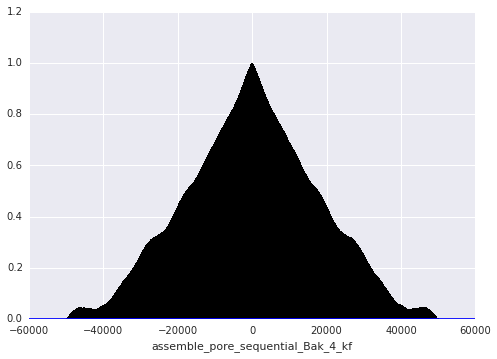

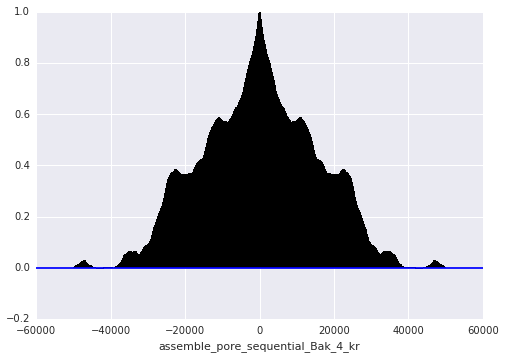

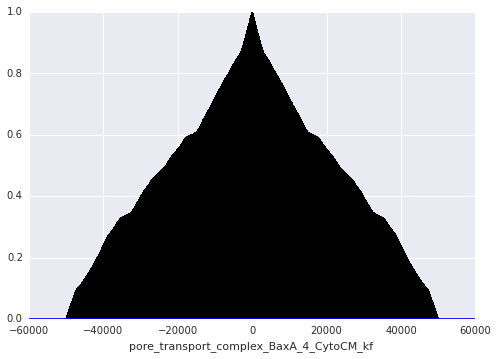

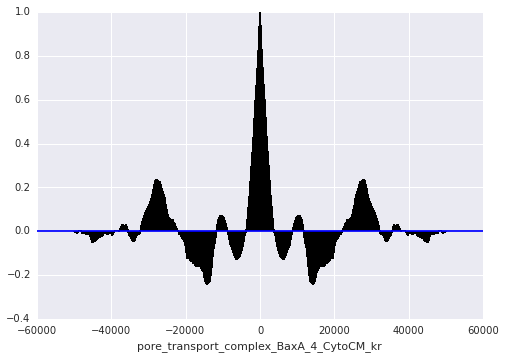

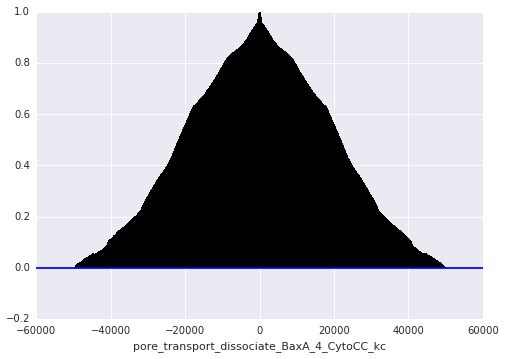

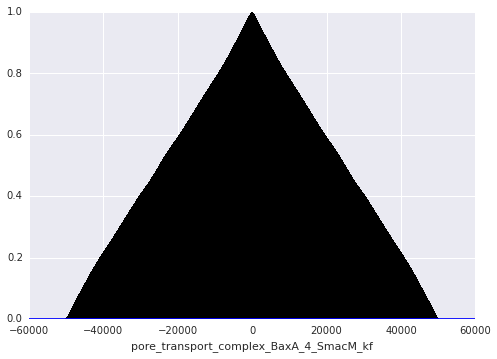

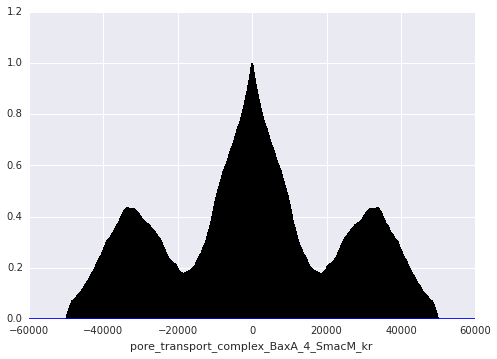

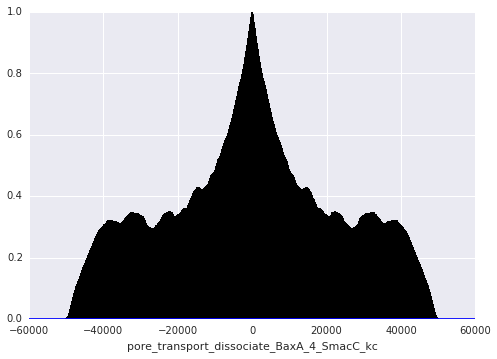

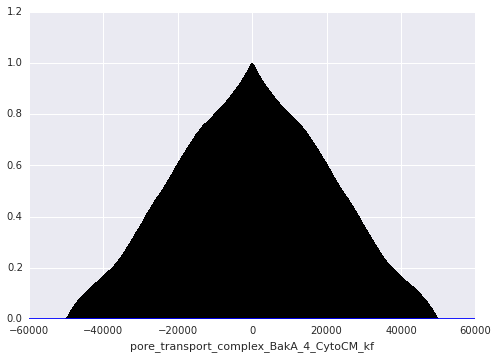

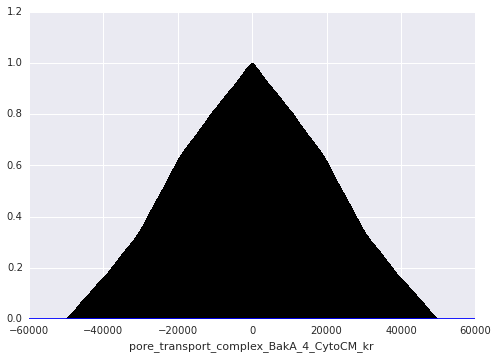

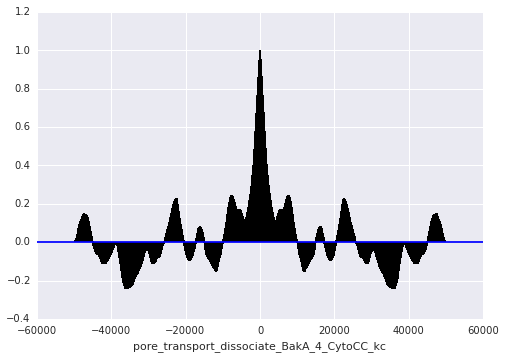

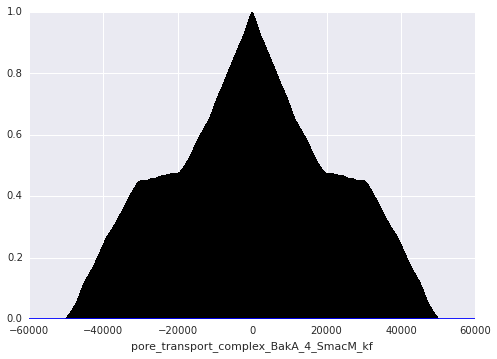

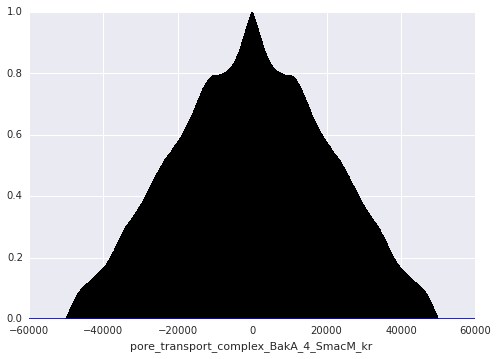

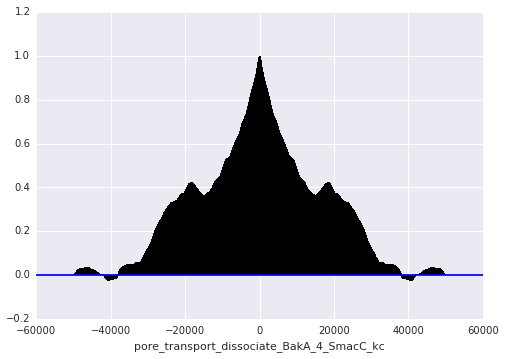

In [15]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    plt.acorr(traces['a'][0][:,dim], maxlags=None)
    plt.xlabel(str(param_name))

In [ ]:
corner(trace_arr_a[:,50:60:], labels=param_trace_dict_a['param_list'][50:60], bins=10)